In [662]:
%pip install matplotlib pandas numpy seaborn wordcloud 

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [663]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json
import ast
from wordcloud import WordCloud, STOPWORDS
import datetime

In [664]:
raw_df = pd.read_csv('Data/edmvco.csv')
raw_df

post_id                                               text  \
0    734858865344880  [Event]\nTuần Lễ Âm Nhạc Việt Nam 2023: CÔNG B...   
1    734277628736337  [Artist]\n\nSteve Aoki (sinh năm 1977) là một ...   
2    734231668740933                Xin vài bài EDM nghe cho dễ ngủ ạ 🙃   
3    733519365478830  🔥CÁC RAVER ĐÃ SẴN SÀNG QUẨY HẾT MÌNH CÙNG DÀN ...   
4    732762162221217    Chúng mình đang có mặt tại Dreamstate 🔥\n#EDMVC   
..               ...                                                ...   
145  662487635915337  Sự việc diễn ra tại Exit Festival 2023 (Serbia...   
146  662435635920537  [Festival]\nUltra Japan chính thức công bố ful...   
147  661326666031434  Sân khấu đỉnh cao của Clear Watera Festival đã...   
148  661290882701679  [News]\nMới đây, ban tổ chức lễ hội Tomorrowla...   
149  660894606074640  Nhảy bằng cả tính m.ạ.ng trên bất kì nền nhạc ...   

                                             post_text  shared_text  \
0    [Event]\nTuần Lễ Âm Nhạc Việt Nam 2023: CÔNG B...          NaN   
1    [Artist]\n\nSteve Aoki (sinh năm 1977) là một ...          NaN   
2                  Xin vài bài EDM nghe cho dễ ngủ ạ 🙃          NaN   
3    🔥CÁC RAVER ĐÃ SẴN SÀNG QUẨY HẾT MÌNH CÙNG DÀN ...          NaN   
4      Chúng mình đang có mặt tại Dreamstate 🔥\n#EDMVC          NaN   
..                                                 ...          ...   
145  Sự việc diễn ra tại Exit Festival 2023 (Serbia...          NaN   
146  [Festival]\nUltra Japan chính thức công bố ful...          NaN   
147  Sân khấu đỉnh cao của Clear Watera Festival đã...          NaN   
148  [News]\nMới đây, ban tổ chức lễ hội Tomorrowla...          NaN   
149  Nhảy bằng cả tính m.ạ.ng trên bất kì nền nhạc ...          NaN   

     original_text                 time   timestamp  \
0              NaN  2023-11-22 04:00:03  1700625603   
1              NaN  2023-11-21 12:00:05  1700568005   
2              NaN  2023-11-20 14:42:23  1700491343   
3              NaN  2023-11-19 13:00:41  1700398841   
4              NaN  2023-11-18 03:38:53  1700278733   
..             ...                  ...         ...   
145            NaN  2023-07-17 08:47:20  1689583640   
146            NaN  2023-07-17 06:29:13  1689575353   
147            NaN  2023-07-15 10:00:01  1689415201   
148            NaN  2023-07-15 07:26:21  1689405981   
149            NaN  2023-07-14 14:04:58  1689343498   

                                                 image  \
0    https://m.facebook.com/photo/view_full_size/?f...   
1                                                  NaN   
2                                                  NaN   
3    https://scontent-iad3-1.xx.fbcdn.net/v/t39.308...   
4                                                  NaN   
..                                                 ...   
145  https://scontent-iad3-2.xx.fbcdn.net/v/t39.308...   
146  https://scontent-iad3-1.xx.fbcdn.net/v/t39.308...   
147  https://m.facebook.com/photo/view_full_size/?f...   
148  https://scontent-iad3-2.xx.fbcdn.net/v/t39.308...   
149                                                NaN   

                                      image_lowquality  \
0    https://scontent-iad3-1.xx.fbcdn.net/v/t39.308...   
1    https://scontent-iad3-2.xx.fbcdn.net/v/t39.308...   
2    https://scontent-iad3-1.xx.fbcdn.net/m1/v/t6/A...   
3    https://scontent-iad3-1.xx.fbcdn.net/v/t39.308...   
4    https://scontent-iad3-2.xx.fbcdn.net/v/t39.308...   
..                                                 ...   
145  https://scontent-iad3-2.xx.fbcdn.net/v/t39.308...   
146  https://scontent-iad3-1.xx.fbcdn.net/v/t39.308...   
147  https://scontent-iad3-1.xx.fbcdn.net/v/t39.308...   
148  https://scontent-iad3-2.xx.fbcdn.net/v/t39.308...   
149  https://scontent-iad3-2.xx.fbcdn.net/v/t15.525...   

                                                images  ...  \
0    ['https://m.facebook.com/photo/view_full_size/...  ...   
1                                                   []  ...   
2              

In [665]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 51 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   post_id                        150 non-null    int64  
 1   text                           146 non-null    object 
 2   post_text                      146 non-null    object 
 3   shared_text                    0 non-null      float64
 4   original_text                  0 non-null      float64
 5   time                           150 non-null    object 
 6   timestamp                      150 non-null    int64  
 7   image                          119 non-null    object 
 8   image_lowquality               150 non-null    object 
 9   images                         150 non-null    object 
 10  images_description             150 non-null    object 
 11  images_lowquality              150 non-null    object 
 12  images_lowquality_description  150 non-null    obj

### Data cleaning and pre-processing

<b>Data cleaning

In [666]:
clean_df = raw_df.dropna(subset= 'fetched_time')
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 111 entries, 0 to 119
Data columns (total 51 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   post_id                        111 non-null    int64  
 1   text                           110 non-null    object 
 2   post_text                      110 non-null    object 
 3   shared_text                    0 non-null      float64
 4   original_text                  0 non-null      float64
 5   time                           111 non-null    object 
 6   timestamp                      111 non-null    int64  
 7   image                          86 non-null     object 
 8   image_lowquality               111 non-null    object 
 9   images                         111 non-null    object 
 10  images_description             111 non-null    object 
 11  images_lowquality              111 non-null    object 
 12  images_lowquality_description  111 non-null    object 


In [667]:
clean_df = clean_df.dropna(axis=1, how="all")
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 111 entries, 0 to 119
Data columns (total 34 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   post_id                        111 non-null    int64  
 1   text                           110 non-null    object 
 2   post_text                      110 non-null    object 
 3   time                           111 non-null    object 
 4   timestamp                      111 non-null    int64  
 5   image                          86 non-null     object 
 6   image_lowquality               111 non-null    object 
 7   images                         111 non-null    object 
 8   images_description             111 non-null    object 
 9   images_lowquality              111 non-null    object 
 10  images_lowquality_description  111 non-null    object 
 11  video                          10 non-null     object 
 12  video_id                       10 non-null     float64


In [668]:
clean_df = clean_df.fillna(0)           # 0: Không có dữ liệu
clean_df = clean_df.replace('[]', 0)
clean_df

post_id                                               text  \
0    734858865344880  [Event]\nTuần Lễ Âm Nhạc Việt Nam 2023: CÔNG B...   
1    734277628736337  [Artist]\n\nSteve Aoki (sinh năm 1977) là một ...   
2    734231668740933                Xin vài bài EDM nghe cho dễ ngủ ạ 🙃   
3    733519365478830  🔥CÁC RAVER ĐÃ SẴN SÀNG QUẨY HẾT MÌNH CÙNG DÀN ...   
4    732762162221217    Chúng mình đang có mặt tại Dreamstate 🔥\n#EDMVC   
..               ...                                                ...   
106  678968874267213         ủa là DJ dữ chưa má???\n#EDMVC #Marshmello   
107  676766991154068  'I got to learn how to love without you\nI got...   
108  675636914600409  CLEAR WATERA - ĐẲNG CẤP - THĂNG HOA\nCLEAR Wat...   
109  675637971266970  Top 10 cách thoát khỏi muộn phiền trong cuộc s...   
119  672236311607136                                                  0   

                                             post_text                 time  \
0    [Event]\nTuần Lễ Âm Nhạc Việt Nam 2023: CÔNG B...  2023-11-22 04:00:03   
1    [Artist]\n\nSteve Aoki (sinh năm 1977) là một ...  2023-11-21 12:00:05   
2                  Xin vài bài EDM nghe cho dễ ngủ ạ 🙃  2023-11-20 14:42:23   
3    🔥CÁC RAVER ĐÃ SẴN SÀNG QUẨY HẾT MÌNH CÙNG DÀN ...  2023-11-19 13:00:41   
4      Chúng mình đang có mặt tại Dreamstate 🔥\n#EDMVC  2023-11-18 03:38:53   
..                                                 ...                  ...   
106         ủa là DJ dữ chưa má???\n#EDMVC #Marshmello  2023-08-16 12:30:03   
107  'I got to learn how to love without you\nI got...  2023-08-12 10:12:22   
108  CLEAR WATERA - ĐẲNG CẤP - THĂNG HOA\nCLEAR Wat...  2023-08-10 12:00:28   
109  Top 10 cách thoát khỏi muộn phiền trong cuộc s...  2023-08-10 09:10:29   
119                                                  0  2023-08-04 08:50:15   

      timestamp                                              image  \
0    1700625603  https://m.facebook.com/photo/view_full_size/?f...   
1    1700568005                                                  0   
2    1700491343                                                  0   
3    1700398841  https://scontent-iad3-1.xx.fbcdn.net/v/t39.308...   
4    1700278733                                                  0   
..          ...                                                ...   
106  1692189003  https://m.facebook.com/photo/view_full_size/?f...   
107  1691835142  https://scontent-iad3-2.xx.fbcdn.net/v/t39.308...   
108  1691668828                                                  0   
109  1691658629  https://scontent-iad3-2.xx.fbcdn.net/v/t39.308...   
119  1691139015  https://scontent-iad3-1.xx.fbcdn.net/v/t39.308...   

                                      image_lowquality  \
0    https://scontent-iad3-1.xx.fbcdn.net/v/t39.308...   
1    https://scontent-iad3-2.xx.fbcdn.net/v/t39.308...   
2    https://scontent-iad3-1.xx.fbcdn.net/m1/v/t6/A...   
3    https://scontent-iad3-1.xx.fbcdn.net/v/t39.308...   
4    https://scontent-iad3-2.xx.fbcdn.net/v/t39.308...   
..                                                 ...   
106  https://scontent-iad3-1.xx.fbcdn.net/v/t39.308...   
107  https://scontent-iad3-2.xx.fbcdn.net/v/t39.308...   
108  https://scontent-iad3-2.xx.fbcdn.net/v/t15.525...   
109  https://scontent-iad3-2.xx.fbcdn.net/v/t39.308...   
119  https://scontent-iad3-2.xx.fbcdn.net/v/t39.308...   

                                                images  \
0    ['https://m.facebook.com/photo/view_full_size/...   
1                                                    0   
2                                                    0   
3    ['https://scontent-iad3-1.xx.fbcdn.net/v/t39.3...   
4                                                    0   
..                                                 ...   
106  ['https://m.facebook.com/photo/view_full_size/...   
107  ['https://scontent-iad3-2.xx.fbcdn.net/v/t39.3...   
108                                                  0   
109  ['https://scontent-iad3-2.xx.fbcdn.net/v

In [669]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 111 entries, 0 to 119
Data columns (total 34 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   post_id                        111 non-null    int64  
 1   text                           111 non-null    object 
 2   post_text                      111 non-null    object 
 3   time                           111 non-null    object 
 4   timestamp                      111 non-null    int64  
 5   image                          111 non-null    object 
 6   image_lowquality               111 non-null    object 
 7   images                         111 non-null    object 
 8   images_description             111 non-null    object 
 9   images_lowquality              111 non-null    object 
 10  images_lowquality_description  111 non-null    object 
 11  video                          111 non-null    object 
 12  video_id                       111 non-null    float64


In [670]:
clean_df = clean_df.reset_index(drop= True)
clean_df.to_csv('Data/clean_data.csv')

<b>Data pre-processing

Reactions analysis 

In [671]:
clean_df['reactions']

0                          {'thích': 24, 'yêu thích': 8}
1      {'thích': 208, 'yêu thích': 36, 'haha': 24, 'w...
2      {'thích': 426, 'yêu thích': 11, 'haha': 133, '...
3      {'thích': 2599, 'yêu thích': 75, 'haha': 1, 'w...
4      {'thích': 47, 'yêu thích': 16, 'wow': 4, 'thươ...
                             ...                        
106    {'thích': 225, 'yêu thích': 2, 'haha': 277, 'b...
107    {'thích': 1393, 'yêu thích': 584, 'haha': 1, '...
108    {'thích': 3048, 'yêu thích': 438, 'haha': 7, '...
109    {'thích': 229, 'yêu thích': 88, 'haha': 45, 'w...
110    {'thích': 148, 'yêu thích': 46, 'wow': 1, 'thư...
Name: reactions, Length: 111, dtype: object

In [672]:
reactions_df = clean_df[['post_id', 'time', 'reactions', 'reaction_count', 'shares', 'comments']]
reactions_df['time'] = pd.to_datetime(reactions_df['time'])
reactions_df['reactions'] = reactions_df['reactions'].apply(lambda x : dict(eval(x)))
reactions_each_type_df = reactions_df['reactions'].apply(pd.Series)
reactions_each_type_df = reactions_each_type_df.fillna(0)
reactions_df = pd.concat([reactions_df, reactions_each_type_df], axis= 1).drop(columns= 'reactions')
reactions_df


C:\Users\solit\AppData\Local\Temp\ipykernel_18100\104041726.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reactions_df['time'] = pd.to_datetime(reactions_df['time'])
C:\Users\solit\AppData\Local\Temp\ipykernel_18100\104041726.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reactions_df['reactions'] = reactions_df['reactions'].apply(lambda x : dict(eval(x)))


post_id                time  reaction_count  shares  comments  \
0    734858865344880 2023-11-22 04:00:03              32       0         4   
1    734277628736337 2023-11-21 12:00:05             274       4        13   
2    734231668740933 2023-11-20 14:42:23             577      25       335   
3    733519365478830 2023-11-19 13:00:41            2680       2         5   
4    732762162221217 2023-11-18 03:38:53              72       0         3   
..               ...                 ...             ...     ...       ...   
106  678968874267213 2023-08-16 12:30:03             508      11        18   
107  676766991154068 2023-08-12 10:12:22            2007      21        30   
108  675636914600409 2023-08-10 12:00:28            3538      12        11   
109  675637971266970 2023-08-10 09:10:29             369      13        43   
110  672236311607136 2023-08-04 08:50:15             197       0         8   

      thích  yêu thích   haha   wow  thương thương  buồn  phẫn nộ  
0      24.0        8.0    0.0   0.0            0.0   0.0      0.0  
1     208.0       36.0   24.0   2.0            4.0   0.0      0.0  
2     426.0       11.0  133.0   1.0            2.0   3.0      1.0  
3    2599.0       75.0    1.0   4.0            0.0   1.0      0.0  
4      47.0       16.0    0.0   4.0            5.0   0.0      0.0  
..      ...        ...    ...   ...            ...   ...      ...  
106   225.0        2.0  277.0   0.0            0.0   4.0      0.0  
107  1393.0      584.0    1.0   0.0           25.0   4.0      0.0  
108  3048.0      438.0    7.0  18.0           25.0   2.0      0.0  
109   229.0       88.0   45.0   2.0            3.0   2.0      0.0  
110   148.0       46.0    0.0   1.0            2.0   0.0      0.0  

[111 rows x 12 columns]

In [673]:
reactions_df.to_csv('Data/reactions_data.csv')

Links analysis

In [674]:
clean_df['links']

0      [{'link': '/story.php?story_fbid=pfbid02Ki9kYS...
1      [{'link': '/story.php?story_fbid=pfbid02KY71Kn...
2      [{'link': '/story.php?story_fbid=pfbid0g5b3C7d...
3      [{'link': '/story.php?story_fbid=pfbid0EfoCF7U...
4      [{'link': '/DreamstateUSA?eav=AfbhA1z_HuYesL9l...
                             ...                        
106    [{'link': '/hashtag/edmvc?_ft_=encrypted_track...
107    [{'link': '/hashtag/edmvc?_ft_=encrypted_track...
108    [{'link': '/story.php?story_fbid=pfbid02sPq6zi...
109    [{'link': '/hashtag/edmvc?_ft_=encrypted_track...
110    [{'link': '/story.php?story_fbid=6722363116071...
Name: links, Length: 111, dtype: object

In [675]:
links_df = pd.DataFrame()
for link in clean_df['links']:
    link_data = json.dumps(link)
    link_data = json.loads(link_data)
    link_data = eval(link_data)
    link_data_df = pd.DataFrame(link_data)
    links_df = pd.concat([links_df, link_data_df])
links_df

link  \
0   /story.php?story_fbid=pfbid02Ki9kYS1GBUq4azqU8...   
1   https://lm.facebook.com/l.php?u=https%3A%2F%2F...   
2   /hashtag/edmvc?refid=17&_ft_=encrypted_trackin...   
3   /hashtag/vietnammusicweek2023?refid=17&_ft_=en...   
4   /hashtag/vmin?refid=17&_ft_=encrypted_tracking...   
..                                                ...   
0   /hashtag/edmvc?_ft_=encrypted_tracking_data.0A...   
1   /story.php?story_fbid=pfbid0ZydwXGXmsU71nJKDhA...   
2   https://m.facebook.com/photo.php?fbid=67563743...   
0   /story.php?story_fbid=672236311607136&substory...   
1   /photo.php?fbid=672236311607136&id=10006462319...   

                                                 text  
0                                            Xem thêm  
1   https://ticketbox.vn/event/vietnam-music-week-...  
2                                              #EDMVC  
3                               #VietnamMusicWeek2023  
4                                               #VMIN  
..                                                ...  
0                                              #EDMVC  
1                                                      
2                                                      
0                                                      
1                                                      

[510 rows x 2 columns]

In [676]:
links_df = links_df.reset_index(drop= True)
links_df = links_df.replace('', 0)
links_df.to_csv('Data/links_data.csv')

Time up post analysis

In [677]:
clean_df['time']

0      2023-11-22 04:00:03
1      2023-11-21 12:00:05
2      2023-11-20 14:42:23
3      2023-11-19 13:00:41
4      2023-11-18 03:38:53
              ...         
106    2023-08-16 12:30:03
107    2023-08-12 10:12:22
108    2023-08-10 12:00:28
109    2023-08-10 09:10:29
110    2023-08-04 08:50:15
Name: time, Length: 111, dtype: object

In [678]:
time_post = clean_df[['post_id', 'time']]
time_post['time'] = pd.to_datetime(time_post['time'])
time_post['date'] = time_post['time'].dt.date
time_post['hour'] = time_post['time'].dt.time
time_post

C:\Users\solit\AppData\Local\Temp\ipykernel_18100\2490160626.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  time_post['time'] = pd.to_datetime(time_post['time'])
C:\Users\solit\AppData\Local\Temp\ipykernel_18100\2490160626.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  time_post['date'] = time_post['time'].dt.date
C:\Users\solit\AppData\Local\Temp\ipykernel_18100\2490160626.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,

post_id                time        date      hour
0    734858865344880 2023-11-22 04:00:03  2023-11-22  04:00:03
1    734277628736337 2023-11-21 12:00:05  2023-11-21  12:00:05
2    734231668740933 2023-11-20 14:42:23  2023-11-20  14:42:23
3    733519365478830 2023-11-19 13:00:41  2023-11-19  13:00:41
4    732762162221217 2023-11-18 03:38:53  2023-11-18  03:38:53
..               ...                 ...         ...       ...
106  678968874267213 2023-08-16 12:30:03  2023-08-16  12:30:03
107  676766991154068 2023-08-12 10:12:22  2023-08-12  10:12:22
108  675636914600409 2023-08-10 12:00:28  2023-08-10  12:00:28
109  675637971266970 2023-08-10 09:10:29  2023-08-10  09:10:29
110  672236311607136 2023-08-04 08:50:15  2023-08-04  08:50:15

[111 rows x 4 columns]

In [679]:
time_post.to_csv('Data/time_post.csv')

Reactors analysis

In [680]:
clean_df['reactors']

0                                                      0
1      [{'name': 'Kiên Mai Íme', 'link': 'https://fac...
2      [{'name': 'Bạc Xỉu', 'link': 'https://facebook...
3      [{'name': 'Phat Ngan', 'link': 'https://facebo...
4      [{'name': 'Hungg Le', 'link': 'https://faceboo...
                             ...                        
106    [{'name': 'Kiên Mai Íme', 'link': 'https://fac...
107    [{'name': 'Nghĩa Quách', 'link': 'https://face...
108    [{'name': 'ឡី ណា', 'link': 'https://facebook.c...
109    [{'name': 'Nguyễn Quang', 'link': 'https://fac...
110    [{'name': 'Vũ Quỳnh', 'link': 'https://faceboo...
Name: reactors, Length: 111, dtype: object

In [681]:
tmp_df = clean_df[clean_df['reactors'] != 0]
reactors_df = pd.DataFrame()
for reactor in tmp_df['reactors']:
    reactor_data = json.dumps(reactor)
    reactor_data = json.loads(reactor_data)
    reactor_data = eval(reactor_data)
    reactor_data_df = pd.DataFrame(reactor_data)
    reactors_df = pd.concat([reactors_df, reactor_data_df])
reactors_df['type']

0     like
1     like
2     like
3     like
4      wow
      ... 
45    like
46    love
47    love
48    love
49    love
Name: type, Length: 8610, dtype: object

In [682]:
reactors_df = reactors_df.replace({'like' : 'thích', 'love' : 'yêu thích', 'sad' : 'buồn', 'care' : 'thương thương'})
reactors_df = reactors_df.reset_index(drop= True)
reactors_df = reactors_df.replace('', 0)
reactors_df.to_csv('Data/reactors_data.csv')

Comment-full analysis

In [683]:
clean_df['comments_full']

0      [{'comment_id': '1061064065093152', 'comment_u...
1      [{'comment_id': '865432821690369', 'comment_ur...
2      [{'comment_id': '1002554197493256', 'comment_u...
3      [{'comment_id': '866036398252543', 'comment_ur...
4      [{'comment_id': '374895771637258', 'comment_ur...
                             ...                        
106    [{'comment_id': '644423690978847', 'comment_ur...
107    [{'comment_id': '319444710530678', 'comment_ur...
108    [{'comment_id': '1011325836665119', 'comment_u...
109    [{'comment_id': '573802094770298', 'comment_ur...
110    [{'comment_id': '1310257489599662', 'comment_u...
Name: comments_full, Length: 111, dtype: object

In [684]:
tmp2_df = clean_df[clean_df['comments_full'] != 0]
comments_full_df = pd.DataFrame()
for comment in tmp2_df['comments_full']:
    comment_data = json.dumps(comment)
    comment_data = json.loads(comment_data)
    comment_data = eval(comment_data)
    comment_data_df = pd.DataFrame(comment_data)
    comments_full_df = pd.concat([comments_full_df, comment_data_df])
comments_full_df

C:\Users\solit\AppData\Local\Temp\ipykernel_18100\2692200696.py:8: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  comments_full_df = pd.concat([comments_full_df, comment_data_df])
C:\Users\solit\AppData\Local\Temp\ipykernel_18100\2692200696.py:8: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  comments_full_df = pd.concat([comments_full_df, comment_data_df])
C:\Users\solit\AppData\Local\Temp\ipykernel_18100\2692200696.py:8: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA

comment_id                            comment_url     commenter_id  \
0   1061064065093152  https://facebook.com/1061064065093152  100064623192769   
1    746007517389746   https://facebook.com/746007517389746  100004233820245   
2   1587591868715101  https://facebook.com/1587591868715101  100004028093197   
0    865432821690369   https://facebook.com/865432821690369  100064623192769   
1   1783294532107184  https://facebook.com/1783294532107184  100005519463021   
..               ...                                    ...              ...   
3   1472344080250863  https://facebook.com/1472344080250863  100010067591455   
4    302208355662958   https://facebook.com/302208355662958  100006861136137   
5    293122040065458   https://facebook.com/293122040065458  100007760587444   
6    248371768128047   https://facebook.com/248371768128047  100085238347563   
7   1016898652773345  https://facebook.com/1016898652773345  100024594242282   

                                        commenter_url         commenter_name  \
0   https://facebook.com/edmvco?eav=AfYeMqh7p8OHnb...  EDM Vietnam Community   
1   https://facebook.com/thanhluan10497?eav=Afavm_...      Nguyễn Thành Luân   
2   https://facebook.com/profile.php?id=1000040280...               Duy Minh   
0   https://facebook.com/edmvco?eav=AfY-7w2v2_zcL-...  EDM Vietnam Community   
1   https://facebook.com/phamtamphong2101?eav=AfZu...         Phạm Tâm Phong   
..                                                ...                    ...   
3   https://facebook.com/bestedmbeat?eav=AfasRbR8c...         Dang Chi Huong   
4   https://facebook.com/profile.php?id=1000068611...         Anh Khoa Hoang   
5   https://facebook.com/flamez.nguyen.0212?eav=Af...  Nguyễn Hoàng Đông Phi   
6   https://facebook.com/profile.php?id=1000852383...              Minh Nhật   
7   https://facebook.com/hoanganh.raver?eav=AfZYo0...         Hoang Anh Pham   

   commenter_meta                                       comment_text  \
0         Tác giả  Tuần Lễ Âm Nhạc Việt Nam - Vietnam Music Week ...   
1            None                                  Nguyễn Thành Luân   
2            None                                           Duy Minh   
0         Tác giả                            Sắp được gặp idol rồi 🤭   
1            None  Cho đi của anh, cụ thể là ném bánh vào mặt fan...   
..            ...                                                ...   
3            None                                                  🔥   
4            None                                                  🤩   
5            None           Khi nào Best Of EDMVC 2023 trở lại v ad?   
6            None                                               nghệ   
7            None                                            mượtttt   

   comment_time                                      comment_image  \
0           NaT  https://ticketbox.vn/event/vietnam-music-week-...   
1           NaT  https://scontent-iad3-2.xx.fbcdn.net/v/t39.199...   
2           NaT  https://media2.giphy.com/media/dU03jW3KgknVAq9...   
0           NaT  https://scontent-iad3-1.xx.fbcdn.net/m1/v/t6/A...   
1           NaT  https://scontent-iad3-1.xx.fbcdn.net/m1/v/t6/A...   
..          ...                                                ...   
3    2023-07-23                                               None   
4    2023-07-23                                               None   
5    2023-07-23                                               None   
6    2023-07-23                                               None   
7    2023-07-23                                               None   

                                     comment_reactors comment_reactions  \
0                                                  []              None   
1                                                  []              None   
2                                                  []              None   
0   [{'name': 'Nga Phạm', 'link': 'https://faceboo...       {'like': 1}   
1   [{'

In [685]:
comments_full_df = comments_full_df.reset_index(drop= True)
comments_full_df['commenter_meta'] = comments_full_df['commenter_meta'].fillna('Người xem')
comments_full_df['comment_time'] = comments_full_df['comment_time'].fillna(comments_full_df['comment_time'].mean())
comments_full_df['comment_time'] = comments_full_df['comment_time'].dt.date
comments_full_df = comments_full_df.fillna(0)
comments_full_df = comments_full_df.replace('[]', 0)
comments_full_df.to_csv('Data/comments_full.csv')


![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

### Page information

Tên page

In [686]:
clean_df['username'].loc[0]

'EDM Vietnam Community'

ID page

In [687]:
clean_df['page_id'].loc[0]

673611379413932

URL page

In [688]:
clean_df['user_url'].loc[0]

'https://facebook.com/edmvco?lst=61553217674439%3A100064623192769%3A1700745307&eav=AfbRVPtwo8MdkbYYgJfsdR3XzRHTFDL9t2wY48-ujBuKf8TLOVv2RZq3A8JWhCbwkow&refid=17&_ft_=encrypted_tracking_data.0AY8IAkdbNsv41TKth-R9Y6cyBUPO5XucmFMDHfW2E4guPV5xy3MBI4xMDTaWsh-aH5BA0kqbp0K9mUcRDoHBjjQxHSO1hTR4-8ahdT-2ItMq6_zToCuGsZdjkvQKQNwXnmKzJSUCXn74KzCjef4tNzYvnZgUk2flgS9qXYCgmzWIBU3a5-ECm2L6CPRnu0K0KM-gWAQqYKxHNlumVFBoKVWdl4RMVT8LNpus40ztkeSoqTNQpawq1zHm5RXCpRFg3ReymOsRY0WpI4i-7FBDnGWo57JATB0hfVg4n0KTpph-GjRBjxSX17M2ajetMB1JVM2P1LEBq3hA3av8RaiBqXHQ0Bw5gI5ywmVOh2il46Uo-Frl4ue7K28k2NxI9NHyyJyxATgvKGmL-P3ZcibIwvqZUm9DrLgajpH-IBhTqFJbeZeX4c4uT95sr_RkKRNm_6BEfckVP8ISdyNgIH81ColrG4i8wV8ST0HVW3bcHdISTHqvkC2UTC_OIIqCUzCAgU3kXmMNtlVcd1N6a6cLhMGJzlXQVGFfkNkymt56wM7z9o0xrAR62s2NAlEcuE8dI39KzVJ__y2xE13jU_4MRnrGgaVuPkzxZ3uGLpHO0KIWJRWVysnTxV6WikmUMKoZ__Dn362KbLqO8Hca0G1BDSmI6lRLW8gei1NAhMk2hm7lP_jj7Rb5iQkxKvFzwEpf0EuusqrBLDkZD60zxHdYETsyI7ZiMtXVANvgCtb_DJ3Hx1a8DI7TMC49KmpaXk9WNTxl3u7QEjNqWFHBvqY1Hf1bIt2nmq0mAOS87coyLs

### Reactions, shares and comments analysis

Tổng quan về số lượt share

In [689]:
clean_df['shares'].describe()

count    111.000000
mean      42.504505
std      116.319456
min        0.000000
25%        3.000000
50%        7.000000
75%       24.000000
max      866.000000
Name: shares, dtype: float64

Bài viết có số lượt share cao nhất

In [690]:
clean_df.nlargest(1, 'shares', keep= 'all')

post_id                                               text  \
60  699546618876105  Thông tin đã được công bố chính thức bởi Heine...   

                                            post_text                 time  \
60  Thông tin đã được công bố chính thức bởi Heine...  2023-09-22 03:28:12   

     timestamp                                              image  \
60  1695353292  https://scontent-iad3-1.xx.fbcdn.net/v/t39.308...   

                                     image_lowquality  \
60  https://scontent-iad3-1.xx.fbcdn.net/v/t39.308...   

                                               images  \
60  ['https://scontent-iad3-1.xx.fbcdn.net/v/t39.3...   

                              images_description  \
60  ['Có thể là hình ảnh về 2 người và văn bản']   

                                    images_lowquality  ...  \
60  ['https://scontent-iad3-1.xx.fbcdn.net/v/t39.3...  ...   

                                        comments_full  \
60  [{'comment_id': '974409186963699', 'comment_ur...   

                                             reactors  \
60  [{'name': 'Nguyễn Trung', 'link': 'https://fac...   

                                            w3_fb_url  \
60  https://www.facebook.com/edmvco/posts/69954661...   

                                            reactions  reaction_count  \
60  {'thích': 21157, 'yêu thích': 4536, 'haha': 57...           30029   

            page_id      image_id            image_ids was_live  \
60  673611379413932  6.995463e+14  ['699546348876132']    False   

                  fetched_time  
60  2023-11-23 13:28:00.155401  

[1 rows x 34 columns]

Tổng số lượt shares

In [691]:
clean_df['shares'].sum()

4718

Tổng quan về số lượng comment

In [692]:
clean_df['comments'].describe()

count     111.000000
mean      183.810811
std       577.739978
min         1.000000
25%         9.500000
50%        23.000000
75%        85.000000
max      5243.000000
Name: comments, dtype: float64

Bài viết có số lượt comment cao nhất

In [693]:
clean_df.nlargest(1, 'comments', keep= 'all')

post_id                                               text  \
60  699546618876105  Thông tin đã được công bố chính thức bởi Heine...   

                                            post_text                 time  \
60  Thông tin đã được công bố chính thức bởi Heine...  2023-09-22 03:28:12   

     timestamp                                              image  \
60  1695353292  https://scontent-iad3-1.xx.fbcdn.net/v/t39.308...   

                                     image_lowquality  \
60  https://scontent-iad3-1.xx.fbcdn.net/v/t39.308...   

                                               images  \
60  ['https://scontent-iad3-1.xx.fbcdn.net/v/t39.3...   

                              images_description  \
60  ['Có thể là hình ảnh về 2 người và văn bản']   

                                    images_lowquality  ...  \
60  ['https://scontent-iad3-1.xx.fbcdn.net/v/t39.3...  ...   

                                        comments_full  \
60  [{'comment_id': '974409186963699', 'comment_ur...   

                                             reactors  \
60  [{'name': 'Nguyễn Trung', 'link': 'https://fac...   

                                            w3_fb_url  \
60  https://www.facebook.com/edmvco/posts/69954661...   

                                            reactions  reaction_count  \
60  {'thích': 21157, 'yêu thích': 4536, 'haha': 57...           30029   

            page_id      image_id            image_ids was_live  \
60  673611379413932  6.995463e+14  ['699546348876132']    False   

                  fetched_time  
60  2023-11-23 13:28:00.155401  

[1 rows x 34 columns]

Tổng số lượt comment

In [694]:
clean_df['comments'].sum()

20403

Tổng quan về số lượt reactions

In [695]:
reactions_df['reaction_count'].describe()

count      111.000000
mean      2034.054054
std       5217.361811
min         32.000000
25%        227.000000
50%        572.000000
75%       1479.000000
max      37629.000000
Name: reaction_count, dtype: float64

Bài viết có số lượt reaction cao nhất

In [696]:
clean_df.nlargest(1, 'reaction_count', keep= 'all')

post_id                                               text  \
44  707938714703562  Alan Walker vừa đáp xuống sân bay Tân Sơn Nhất...   

                                            post_text                 time  \
44  Alan Walker vừa đáp xuống sân bay Tân Sơn Nhất...  2023-10-06 07:51:43   

     timestamp                                              image  \
44  1696578703  https://scontent-iad3-2.xx.fbcdn.net/v/t39.308...   

                                     image_lowquality  \
44  https://scontent-iad3-2.xx.fbcdn.net/v/t39.308...   

                                               images  \
44  ['https://scontent-iad3-2.xx.fbcdn.net/v/t39.3...   

                              images_description  \
44  ['Có thể là hình ảnh về 5 người và văn bản']   

                                    images_lowquality  ...  \
44  ['https://scontent-iad3-2.xx.fbcdn.net/v/t39.3...  ...   

                                        comments_full  \
44  [{'comment_id': '704206627756211', 'comment_ur...   

                                             reactors  \
44  [{'name': 'フォン 晴美', 'link': 'https://facebook....   

                                            w3_fb_url  \
44  https://www.facebook.com/edmvco/posts/70793871...   

                                            reactions  reaction_count  \
44  {'thích': 28091, 'yêu thích': 5803, 'haha': 29...           37629   

            page_id      image_id            image_ids was_live  \
44  673611379413932  7.079385e+14  ['707938534703580']    False   

                  fetched_time  
44  2023-11-23 13:25:01.830537  

[1 rows x 34 columns]

Tổng số lượng reactions

In [697]:
reactions_df['reaction_count'].sum()

225780

Sự thay đổi của số lượt reactions theo thời gian

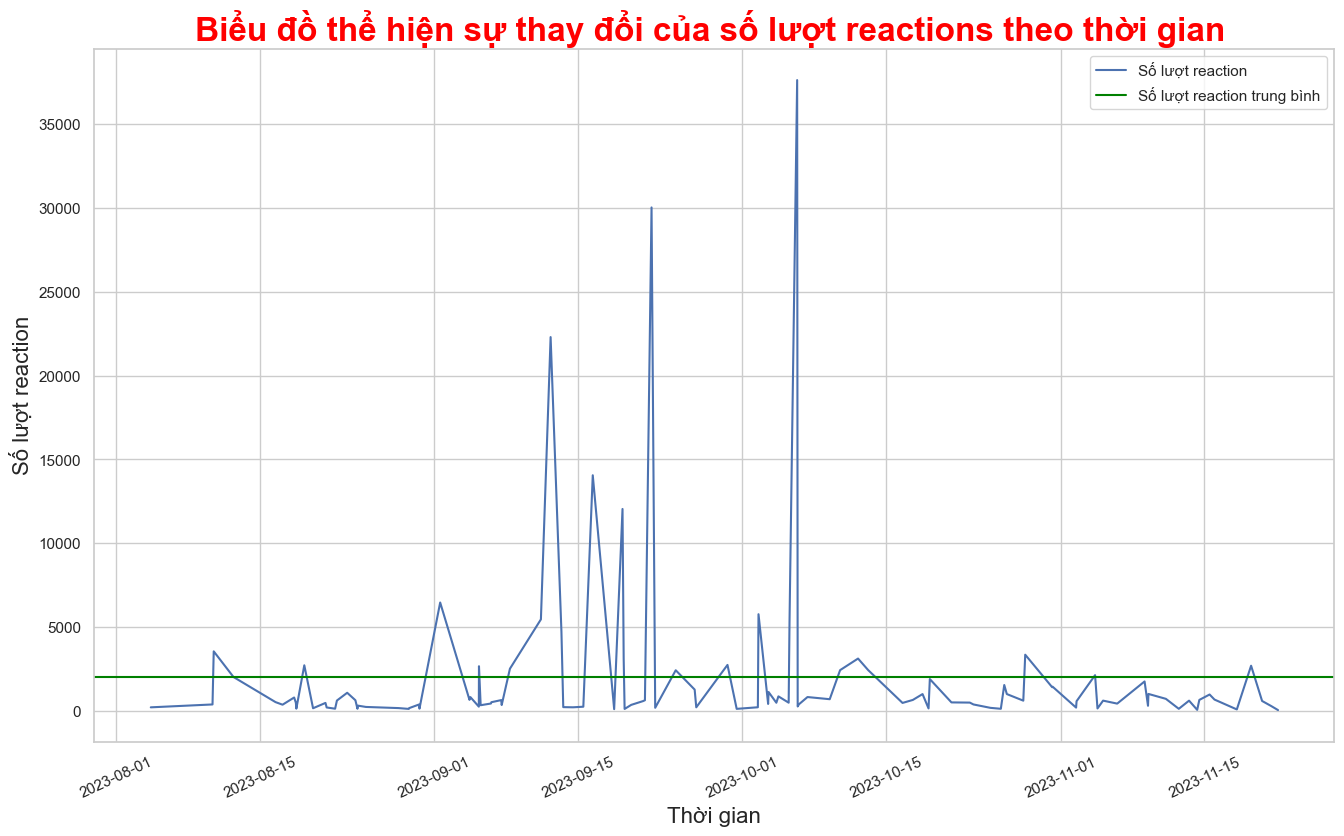

In [698]:
sns.set_theme(style="whitegrid")
plt.subplots(figsize=(16, 9))
sns.lineplot(x = 'time', y = 'reaction_count', data = reactions_df, label= 'Số lượt reaction')
plt.xticks(rotation = 25)
plt.xlabel('Thời gian', fontsize=16)
plt.ylabel('Số lượt reaction', fontsize=16)
plt.title('Biểu đồ thể hiện sự thay đổi của số lượt reactions theo thời gian ', fontsize=24, color='red', fontweight='bold')
plt.axhline(reactions_df['reaction_count'].mean(), color='green', label='Số lượt reaction trung bình')
plt.legend()

Số lượng reactions mỗi loại 

thích            159196.0
yêu thích         24203.0
haha              27115.0
wow                9032.0
thương thương      1164.0
buồn               5027.0
phẫn nộ              43.0
dtype: float64

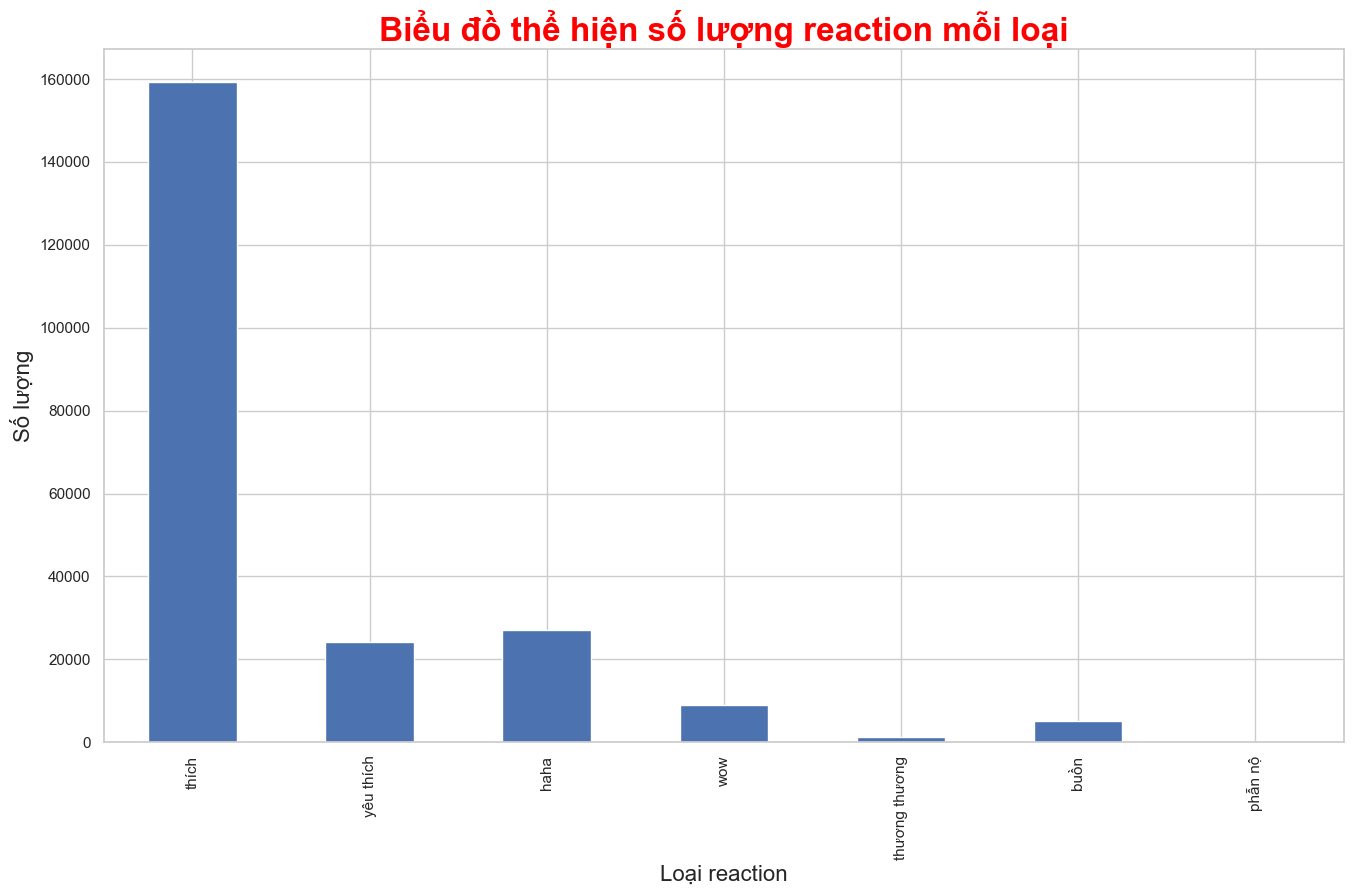

In [699]:
sum_of_reaction = pd.Series(reactions_df[['thích', 'yêu thích', 'haha', 'wow', 'thương thương', 'buồn', 'phẫn nộ']].sum())
sum_of_reaction.plot(kind= 'bar', figsize= (16, 9))
plt.xlabel('Loại reaction', fontsize=16)
plt.ylabel('Số lượng', fontsize=16)
plt.title('Biểu đồ thể hiện số lượng reaction mỗi loại', fontsize=24, color='red', fontweight='bold')
sum_of_reaction

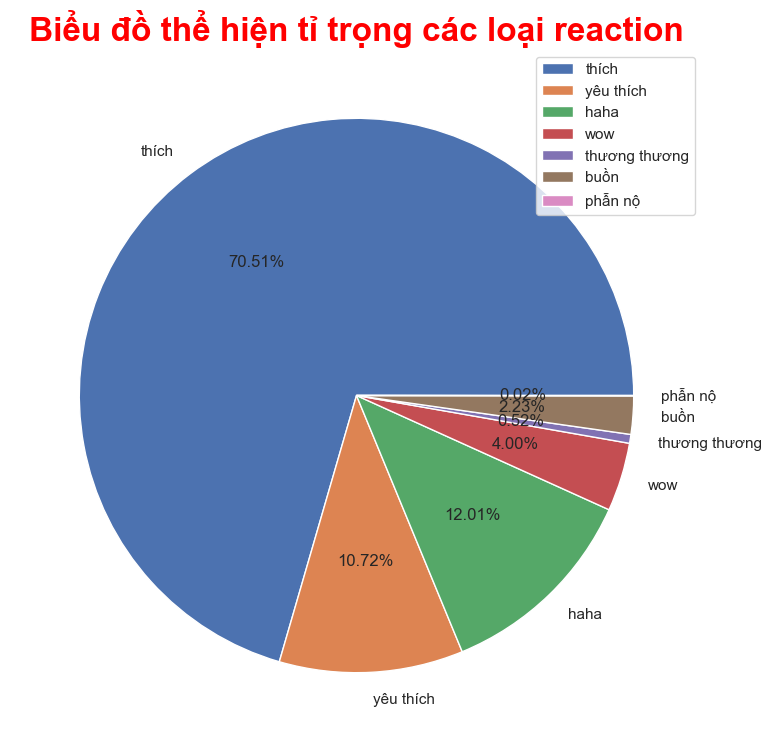

In [700]:
sum_of_reaction.plot(kind= 'pie', figsize= (9, 9), autopct='%1.2f%%')
plt.title('Biểu đồ thể hiện tỉ trọng các loại reaction', fontsize=24, color='red', fontweight='bold')
plt.legend()

Sự tương quan giữa số lượng reactions với số lượng comments và shares

In [701]:
corr = reactions_df[['reaction_count', 'shares', 'comments', 'thích', 'yêu thích', 
                     'haha', 'wow', 'thương thương', 'buồn', 'phẫn nộ']].corr(numeric_only= True)

corr

reaction_count    shares  comments     thích  yêu thích  \
reaction_count        1.000000  0.792502  0.827602  0.988563   0.908291   
shares                0.792502  1.000000  0.882487  0.719802   0.678506   
comments              0.827602  0.882487  1.000000  0.794128   0.772744   
thích                 0.988563  0.719802  0.794128  1.000000   0.916741   
yêu thích             0.908291  0.678506  0.772744  0.916741   1.000000   
haha                  0.560174  0.630695  0.416061  0.453916   0.294520   
wow                   0.613441  0.709115  0.777688  0.597708   0.582363   
thương thương         0.918958  0.709874  0.774155  0.915305   0.986707   
buồn                  0.322393  0.442953  0.278643  0.219159   0.048806   
phẫn nộ               0.513368  0.635160  0.679619  0.446319   0.372521   

                    haha       wow  thương thương      buồn   phẫn nộ  
reaction_count  0.560174  0.613441       0.918958  0.322393  0.513368  
shares          0.630695  0.709115       0.709874  0.442953  0.635160  
comments        0.416061  0.777688       0.774155  0.278643  0.679619  
thích           0.453916  0.597708       0.915305  0.219159  0.446319  
yêu thích       0.294520  0.582363       0.986707  0.048806  0.372521  
haha            1.000000  0.078064       0.381766  0.771532  0.504361  
wow             0.078064  1.000000       0.551108  0.027142  0.461923  
thương thương   0.381766  0.551108       1.000000  0.126406  0.397234  
buồn            0.771532  0.027142       0.126406  1.000000  0.552107  
phẫn nộ         0.504361  0.461923       0.397234  0.552107  1.000000

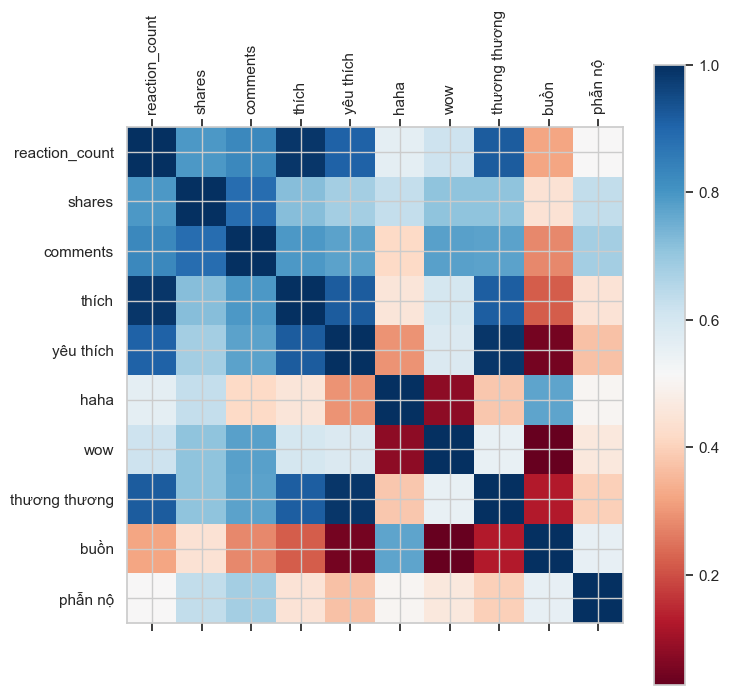

In [702]:
fig = plt.figure(figsize=(8,8))
plt.matshow(corr, cmap='RdBu', fignum=fig.number)
plt.xticks(range(len(corr.columns)), corr.columns, rotation='vertical');
plt.yticks(range(len(corr.columns)), corr.columns);
plt.colorbar()

<Axes: xlabel='thích', ylabel='reaction_count'>

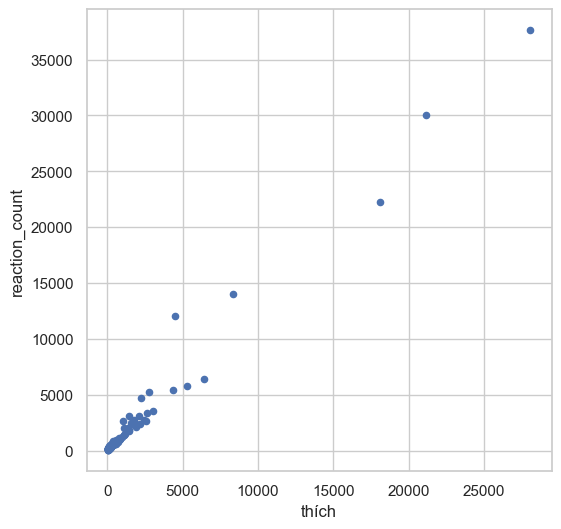

In [703]:
reactions_df.plot(kind='scatter', x='thích', y='reaction_count', figsize=(6,6))

### Post analysis

Số bài viết có văn bản

In [704]:
num_of_post_with_text = clean_df[clean_df['post_text'] != 0].shape[0]
num_of_post_with_text

110

Số bài viết có hình ảnh

In [705]:
num_of_post_with_image = clean_df[clean_df['image'] != 0].shape[0]
num_of_post_with_image

86

Số bài viết có video

In [706]:
num_of_post_with_video = clean_df[clean_df['video'] != 0].shape[0]
num_of_post_with_video 

10

Biểu đồ thể hiện các loại bài viết

Text(0.5, 1.0, 'Biểu đồ thể hiện số lượng post mỗi loại')

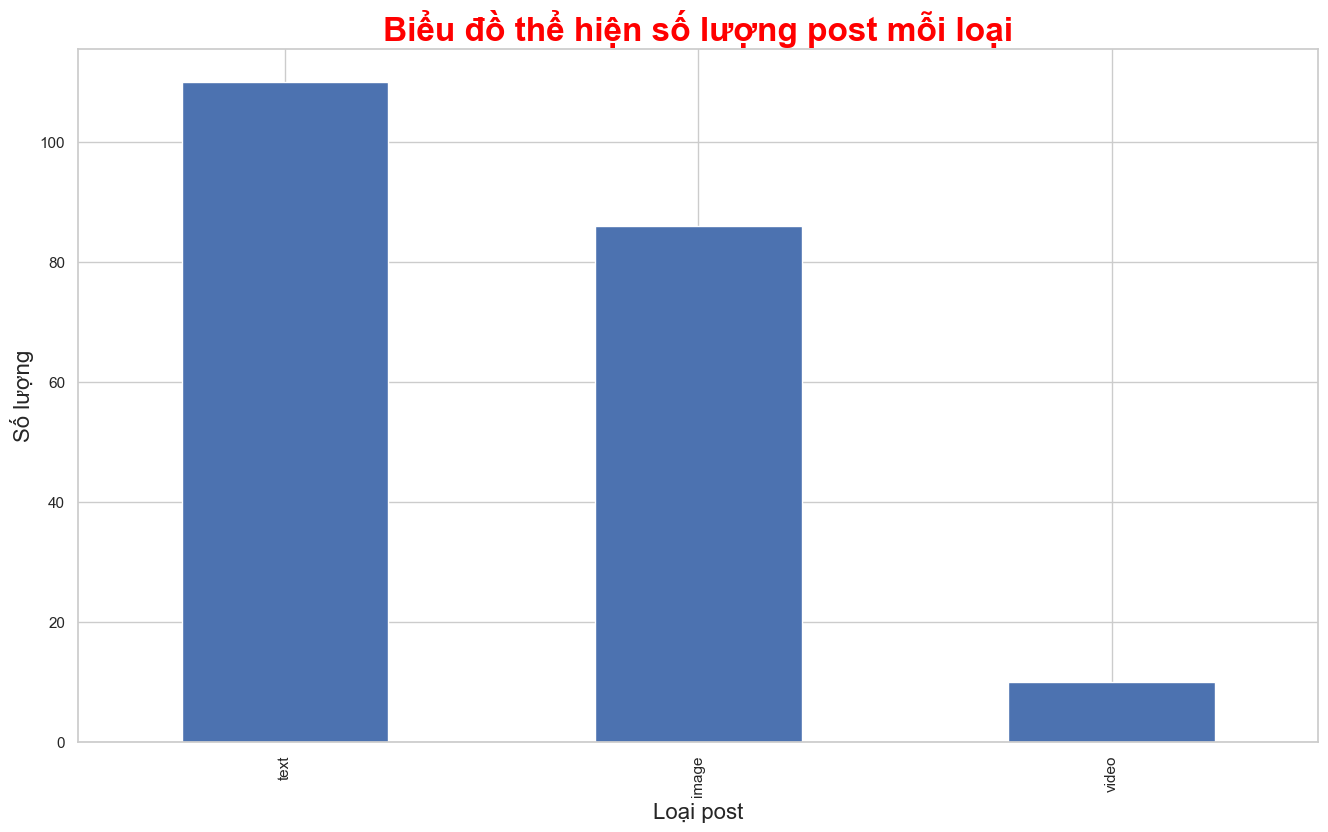

In [707]:
num_of_post = pd.Series([num_of_post_with_text, num_of_post_with_image, num_of_post_with_video], index=['text', 'image', 'video'])
num_of_post.plot(kind= 'bar', figsize= (16, 9))
plt.xlabel('Loại post', fontsize=16)
plt.ylabel('Số lượng', fontsize=16)
plt.title('Biểu đồ thể hiện số lượng post mỗi loại', fontsize=24, color='red', fontweight='bold')

Tất cả đường dẫn đính kèm trong các bài viết

In [708]:
links_df

link  \
0    /story.php?story_fbid=pfbid02Ki9kYS1GBUq4azqU8...   
1    https://lm.facebook.com/l.php?u=https%3A%2F%2F...   
2    /hashtag/edmvc?refid=17&_ft_=encrypted_trackin...   
3    /hashtag/vietnammusicweek2023?refid=17&_ft_=en...   
4    /hashtag/vmin?refid=17&_ft_=encrypted_tracking...   
..                                                 ...   
505  /hashtag/edmvc?_ft_=encrypted_tracking_data.0A...   
506  /story.php?story_fbid=pfbid0ZydwXGXmsU71nJKDhA...   
507  https://m.facebook.com/photo.php?fbid=67563743...   
508  /story.php?story_fbid=672236311607136&substory...   
509  /photo.php?fbid=672236311607136&id=10006462319...   

                                                  text  
0                                             Xem thêm  
1    https://ticketbox.vn/event/vietnam-music-week-...  
2                                               #EDMVC  
3                                #VietnamMusicWeek2023  
4                                                #VMIN  
..                                                 ...  
505                                             #EDMVC  
506                                                  0  
507                                                  0  
508                                                  0  
509                                                  0  

[510 rows x 2 columns]

Tổng số đường dẫn

In [709]:
links_df.shape[0]

510

In [710]:
links_df.shape[0] / clean_df.shape[0]

4.594594594594595

Phân tích về đường dẫn

In [711]:
links_df['text'].value_counts()

text
0                            211
#EDMVC                        86
Xem thêm                      46
#AlanWalker                    9
#KENNATION                     8
                            ... 
Ravolution Music Festival      1
#TheChainsmokers               1
+5                             1
#freedvm_films                 1
#CLEARMátLạnhBạcHà             1
Name: count, Length: 97, dtype: int64

Kiểm tra xem các bài post có đang livestream hay đã từng livestream hay không

In [712]:
clean_df['is_live'].value_counts()

is_live
False    111
Name: count, dtype: int64

In [713]:
clean_df['was_live'].value_counts()

was_live
False    111
Name: count, dtype: int64

Sự thay đổi số lượng post theo thời gian

In [714]:
time_post['date'].value_counts()

date
2023-10-26    3
2023-08-24    3
2023-09-19    3
2023-10-06    3
2023-09-05    3
             ..
2023-11-21    1
2023-09-28    1
2023-09-24    1
2023-09-20    1
2023-08-04    1
Name: count, Length: 73, dtype: int64

Text(0.5, 1.0, 'Biểu đồ thể hiện số lượng bài post theo thời gian')

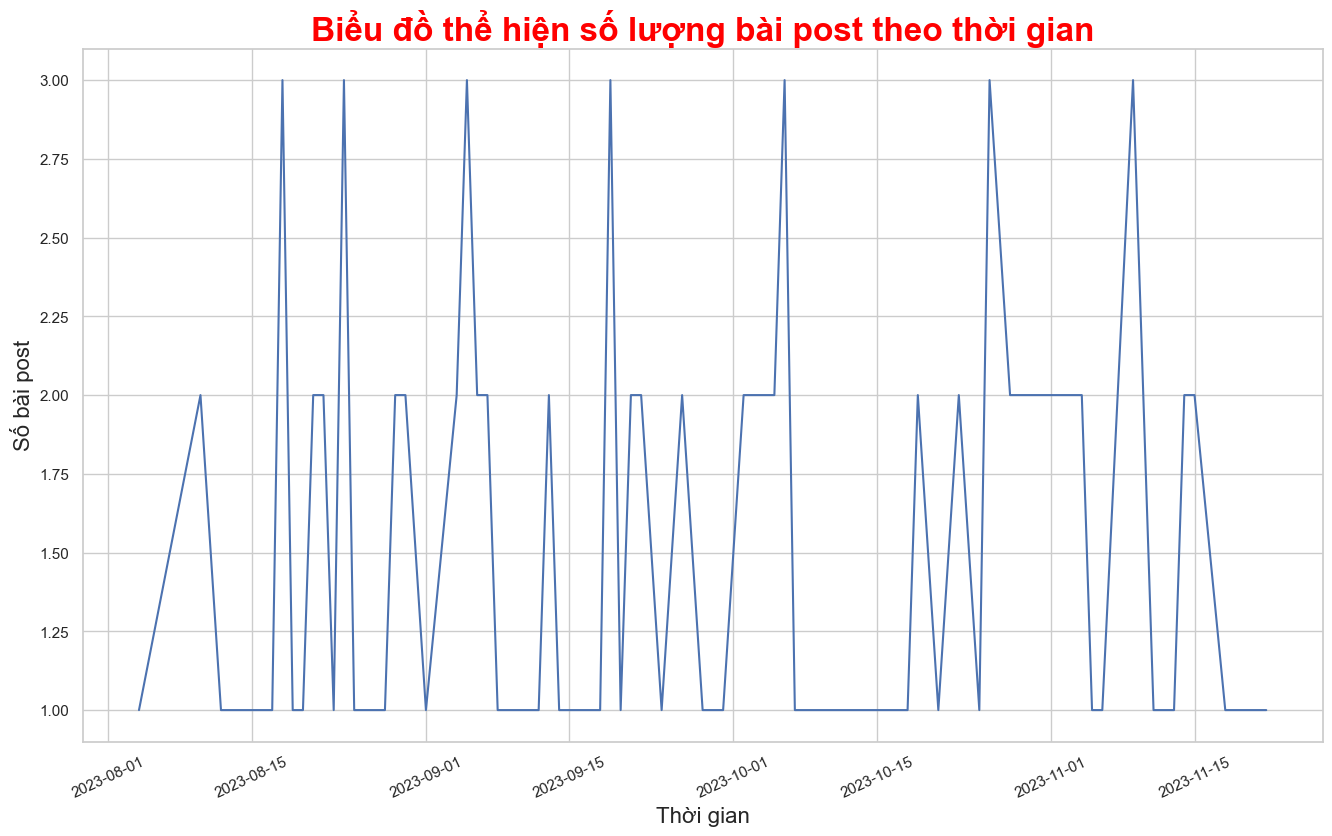

In [715]:
sns.set_theme(style="whitegrid")
plt.subplots(figsize=(16, 9))
time_post['date'].value_counts().sort_index().plot(kind= 'line', figsize= (16, 9))
plt.xticks(rotation = 25)
plt.xlabel('Thời gian', fontsize=16)
plt.ylabel('Số bài post', fontsize=16)
plt.title('Biểu đồ thể hiện số lượng bài post theo thời gian', fontsize=24, color='red', fontweight='bold')

Khoảng thời gian trong ngày mà fanpage hay đăng bài post

In [716]:
time_post['hour'].value_counts()

hour
12:00:01    16
12:00:02     7
13:00:02     2
12:00:05     2
13:00:01     2
            ..
14:14:36     1
06:00:27     1
08:34:22     1
03:27:51     1
08:50:15     1
Name: count, Length: 84, dtype: int64

Text(0.5, 1.0, 'Biểu đồ thể hiện số lượng bài post theo khoảng thời gian trong ngày')

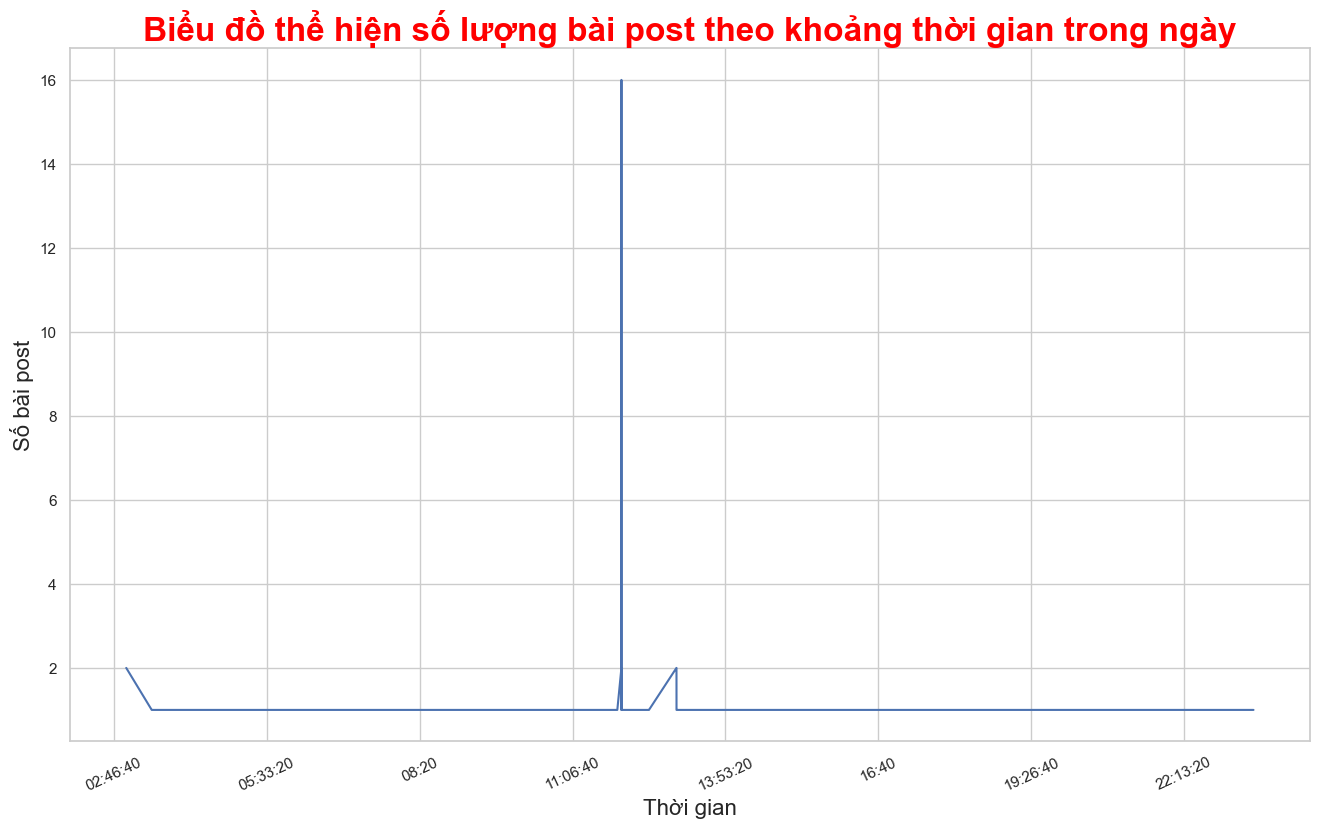

In [717]:
sns.set_theme(style="whitegrid")
plt.subplots(figsize=(16, 9))
time_post['hour'].value_counts().sort_index().plot(kind= 'line', figsize= (16, 9))
plt.xticks(rotation = 25)
plt.xlabel('Thời gian', fontsize=16)
plt.ylabel('Số bài post', fontsize=16)
plt.title('Biểu đồ thể hiện số lượng bài post theo khoảng thời gian trong ngày', fontsize=24, color='red', fontweight='bold')

Phân tích nội dung bài viết

In [718]:
clean_df['post_text']

0      [Event]\nTuần Lễ Âm Nhạc Việt Nam 2023: CÔNG B...
1      [Artist]\n\nSteve Aoki (sinh năm 1977) là một ...
2                    Xin vài bài EDM nghe cho dễ ngủ ạ 🙃
3      🔥CÁC RAVER ĐÃ SẴN SÀNG QUẨY HẾT MÌNH CÙNG DÀN ...
4        Chúng mình đang có mặt tại Dreamstate 🔥\n#EDMVC
                             ...                        
106           ủa là DJ dữ chưa má???\n#EDMVC #Marshmello
107    'I got to learn how to love without you\nI got...
108    CLEAR WATERA - ĐẲNG CẤP - THĂNG HOA\nCLEAR Wat...
109    Top 10 cách thoát khỏi muộn phiền trong cuộc s...
110                                                    0
Name: post_text, Length: 111, dtype: object

In [719]:
text = "" 
for txt in clean_df['post_text']:
    text = text + str(txt) + "\n"
text

'[Event]\nTuần Lễ Âm Nhạc Việt Nam 2023: CÔNG BỐ DÀN DIỄN GIẢ ALL-STAR\n\nTuần Lễ Âm Nhạc Việt Nam 2023 là nơi quy tụ hơn 20 diễn giả dày dặn kinh nghiệm cả trong và ngoài nước ở đa dạng lĩnh vực trong ngành kinhXem thêm doanh âm nhạc nói riêng và ngành âm nhạc & giải trí nói chung.\n\nVới kinh nghiệm nhiều năm trong nghề, các anh chị diễn giả chắc chắn sẽ mang đến những chia sẻ vô cùng chất lượng và giá trị về câu chuyện làm nghề, để từ đó truyền cảm hứng và động lực cho những tâm hồn đam mê âm nhạc nhưng vẫn còn đang băn khoăn về hướng đi của mình.\n\n👉 Đừng bỏ lỡ cơ hội tuyệt vời để kết nối cùng các diễn giả cực xịn xò của sân khấu Tuần Lễ Âm nhạc Việt Nam tại: https://ticketbox.vn/event/vietnam-music-week-87438\n#EDMVC #VietnamMusicWeek2023 #VMIN #VMW2023\n[Artist]\n\nSteve Aoki (sinh năm 1977) là một DJ người Mỹ gốc Nhật. Sau khi tốt nghiệp bằng kép ngành nghiên cứu giới và xã hội học tại Đại học California, anh quyết tâm theo đuổi đam mê bằng việc lập ra hãng thu âm Dim Mak – chu

In [720]:
def get_stopwords_list(stop_file_path):
    with open(stop_file_path, 'r', encoding="utf-8") as f:
        stopwords = f.readlines()
        stop_set = set(m.strip() for m in stopwords)
        return list(frozenset(stop_set))
    
STOPWORDS = get_stopwords_list('Data/stopwords.txt')
STOPWORDS

['quá bộ',
 'trả',
 'điểm chính',
 'tựu trung',
 'lấy xuống',
 'đúng',
 'thứ',
 'tuy vậy',
 'xoành xoạch',
 'dữ',
 'sẽ hay',
 'vâng',
 'nhanh lên',
 'cơ chỉ',
 'bập bõm',
 'từ điều',
 'quá thì',
 'ngồi không',
 'tự vì',
 'ra điều',
 'ở trên',
 'chưa',
 'sau hết',
 'ngày ngày',
 'tại lòng',
 'nói xa',
 'căn tính',
 'vùng nước',
 'thốt thôi',
 'làm tin',
 'ba ngày',
 'gì',
 'lâu lâu',
 'mà cả',
 'ngày xưa',
 'lần theo',
 'trong ngoài',
 'không hay',
 'đưa xuống',
 'để được',
 'cao răng',
 'cơ cùng',
 'luôn tay',
 'trước hết',
 'lần sang',
 'sau nữa',
 'đều bước',
 'tạo nên',
 'bấy chầy',
 'gặp khó khăn',
 'oái',
 'để đến nỗi',
 'từ tại',
 'thật thà',
 'người hỏi',
 'luôn luôn',
 'sự việc',
 'dành',
 'ừ thì',
 'là ít',
 'chắc chắn',
 'thà',
 'chủn',
 'thích ý',
 'lấy thêm',
 'đó',
 'bệt',
 'dưới nước',
 'có phải',
 'càng',
 'như ai',
 'cực lực',
 'bỏ cha',
 'vả lại',
 'như nhau',
 'ăn ngồi',
 'bỏ việc',
 'nói chung',
 'cụ thể',
 'thời gian tính',
 'nhau',
 'quá',
 'tuổi tôi',
 'cái họ',
 

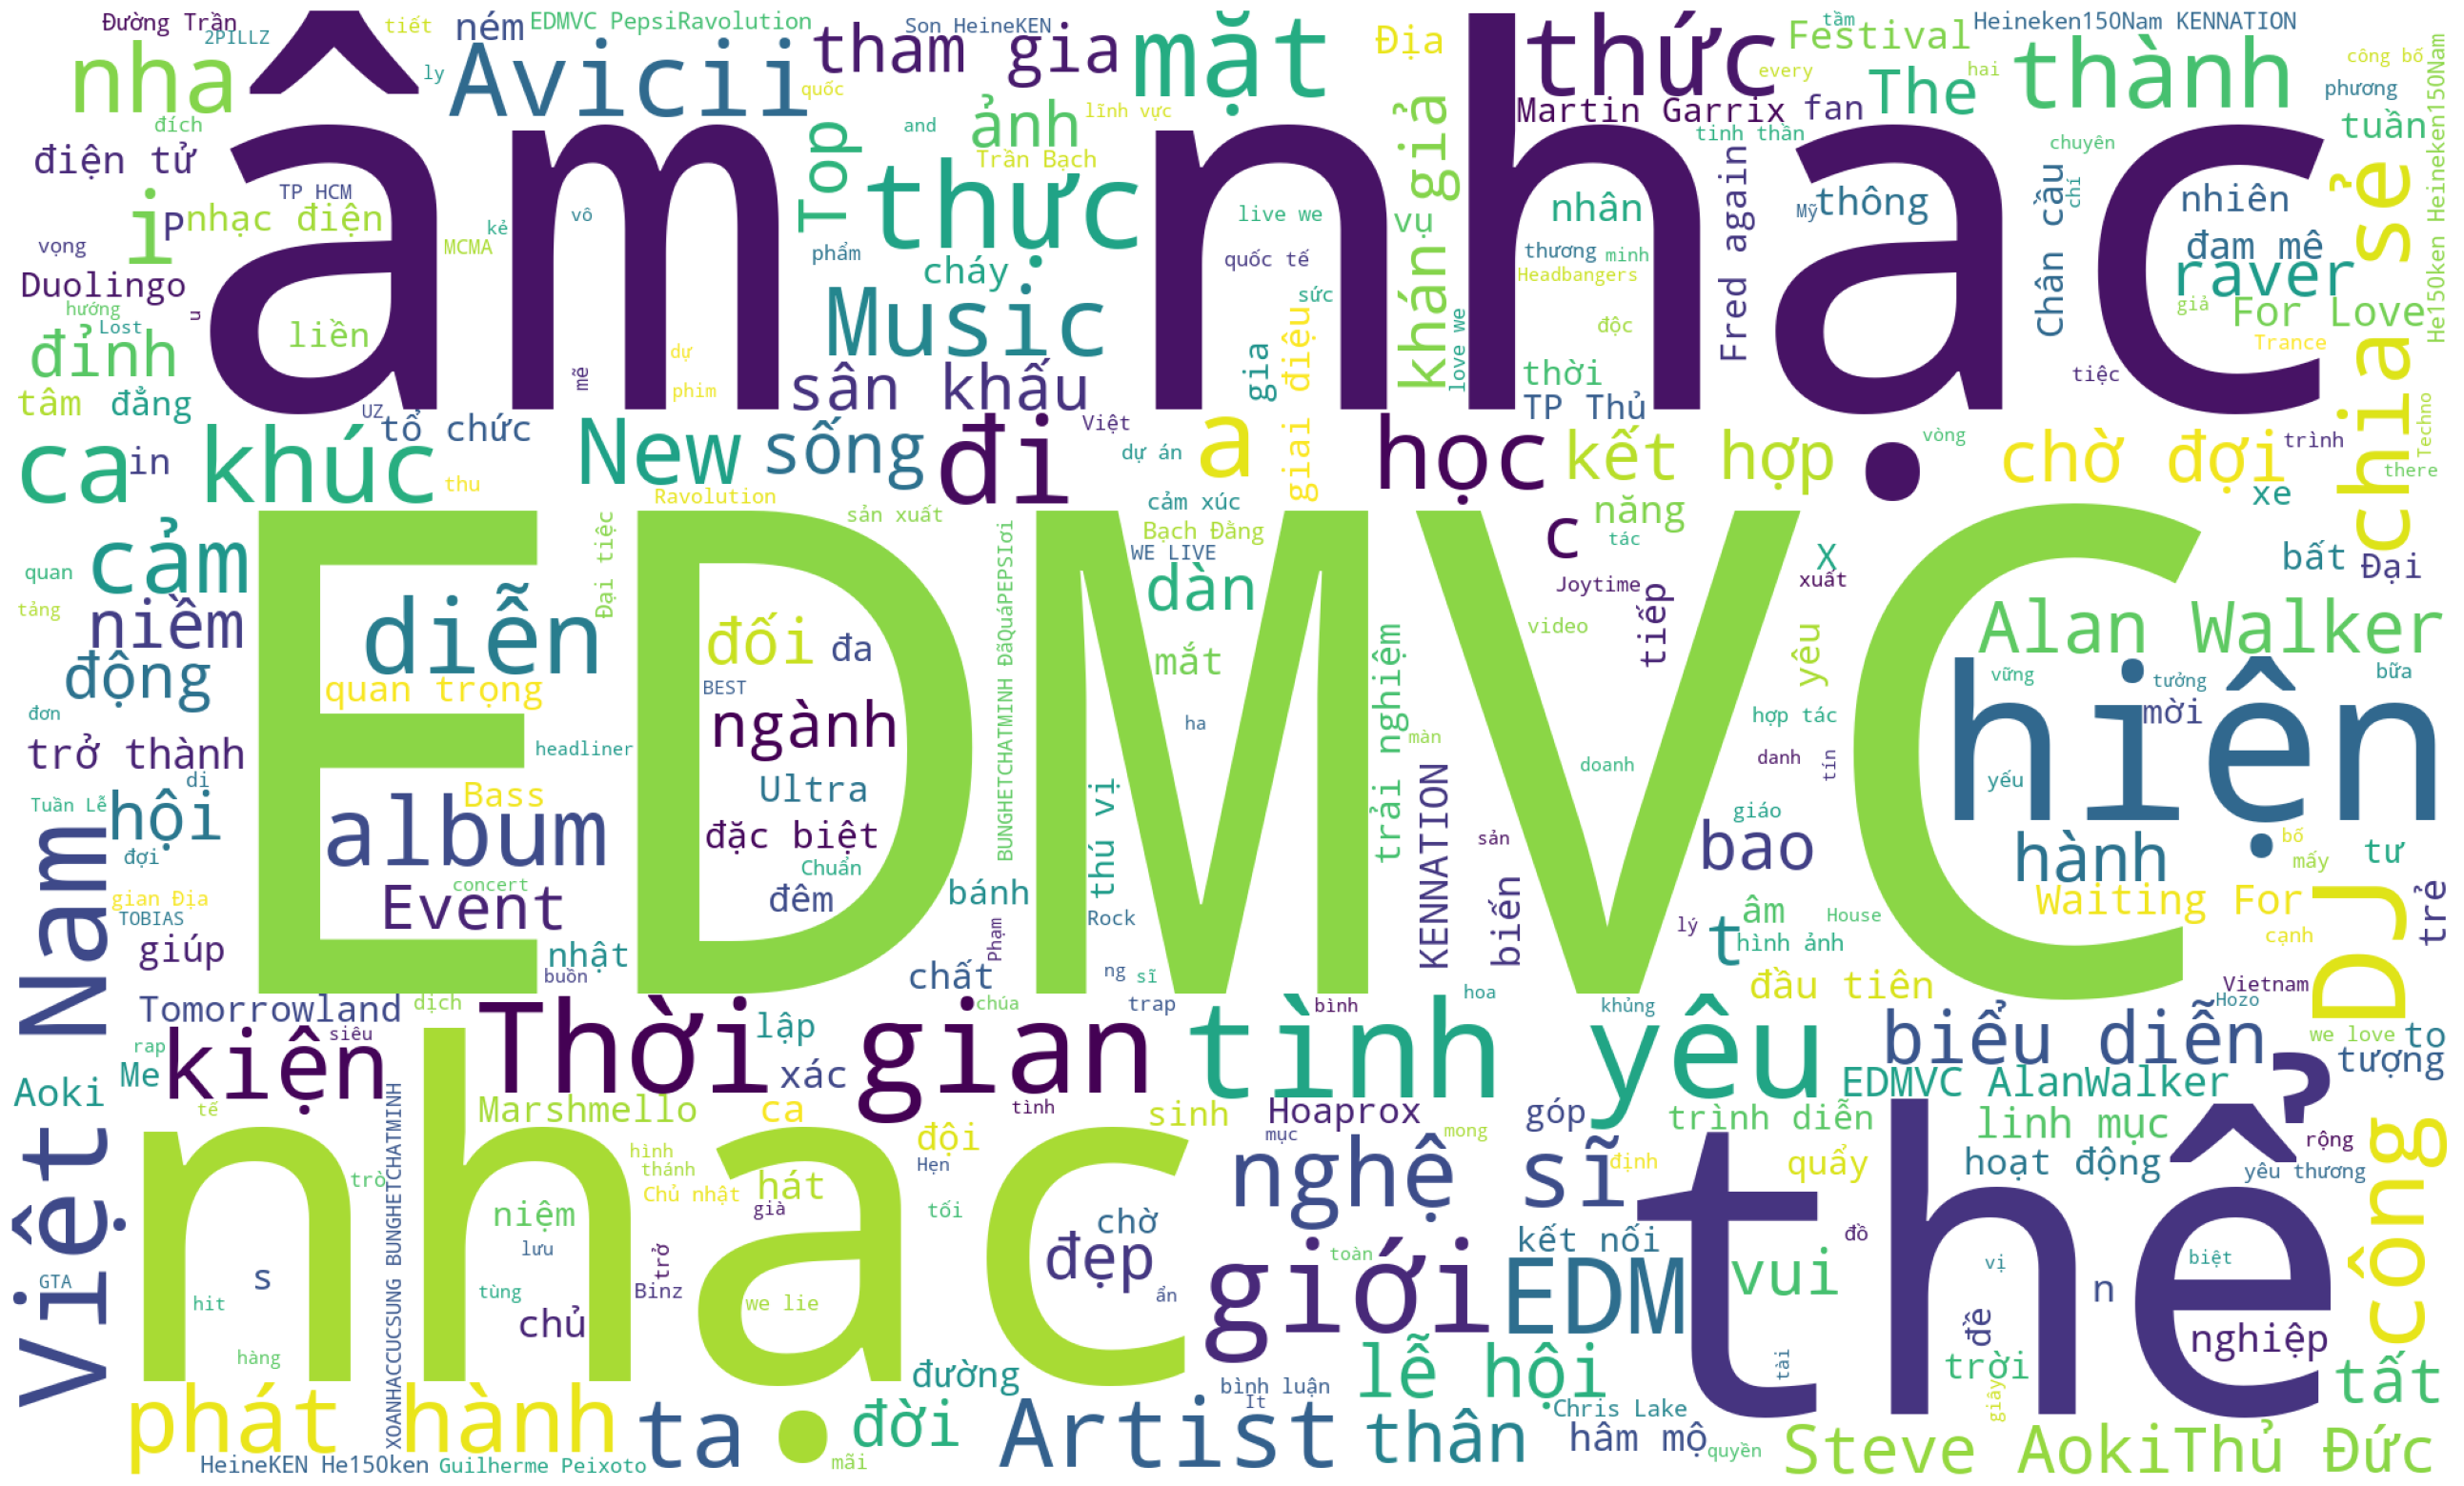

In [721]:
wordcloud = WordCloud(stopwords=STOPWORDS,
                          background_color='white', 
                      max_words=300,
                      width=2000, height=1200
                         ).generate(text)
plt.figure(figsize=(40,20))
plt.clf()
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

### User analysis

Thông tin những người đã react bài viết trong trang

In [722]:
reactors_df

name                                               link  \
0          Kiên Mai Íme  https://facebook.com/profile.php?id=1000940985...   
1             Quinny Ng  https://facebook.com/profile.php?id=1000935124...   
2              Dũng Lee  https://facebook.com/profile.php?id=1000916250...   
3             Tuyết Mai  https://facebook.com/profile.php?id=1000913083...   
4     Nguyễn Thùy Duơng  https://facebook.com/profile.php?id=1000906921...   
...                 ...                                                ...   
8605     Best EDM Beats  https://facebook.com/BESTEDMBEATSS?eav=AfZy-a7...   
8606   Nguyễn Trường An  https://facebook.com/profile.php?id=1000718717...   
8607       Canalis Club  https://facebook.com/canalisclub.vn?eav=Afb2mS...   
8608          Ngô Thắng  https://facebook.com/thang.ngo.1612007?eav=Afa...   
8609   TechBeat Records  https://facebook.com/TechBeat.vn?eav=AfbIVkg6C...   

           type  
0         thích  
1         thích  
2         thích  
3         thích  
4           wow  
...         ...  
8605      thích  
8606  yêu thích  
8607  yêu thích  
8608  yêu thích  
8609  yêu thích  

[8610 rows x 3 columns]

Tên 5 người hay react bài viết của trang nhiều nhất

In [723]:
reactors_df['name'].value_counts().nlargest(5)

name
Lê Uyên Nhựt    42
Ordinary Guy    37
Dani Walker     33
Tùng Vũ         32
Oroka Wanako    30
Name: count, dtype: int64

In [724]:
reactors_df.loc[(reactors_df['name'] == 'Lê Uyên Nhựt'), 'type'].value_counts()

type
yêu thích    21
thích        15
haha          6
Name: count, dtype: int64

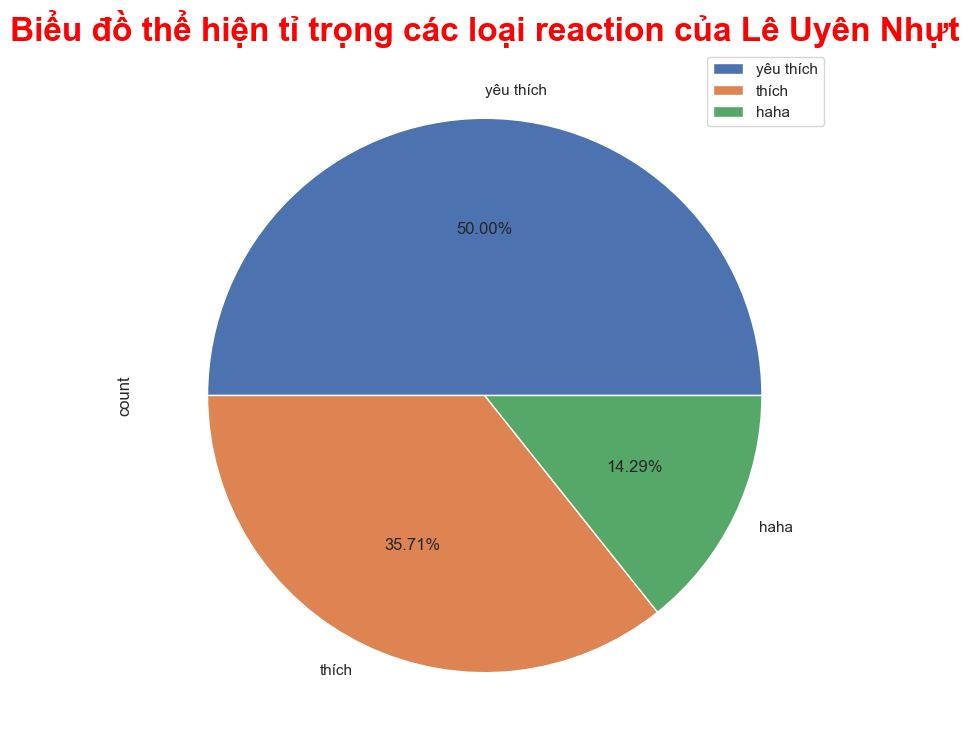

In [725]:
reactors_df.loc[(reactors_df['name'] == 'Lê Uyên Nhựt'), 'type'].value_counts().plot(kind= 'pie', figsize= (9, 9), autopct='%1.2f%%')
plt.title('Biểu đồ thể hiện tỉ trọng các loại reaction của Lê Uyên Nhựt', fontsize=24, color='red', fontweight='bold')
plt.legend()

Thông tin toàn bộ comment trong các bài viết

In [726]:
comments_full_df

comment_id                            comment_url  \
0     1061064065093152  https://facebook.com/1061064065093152   
1      746007517389746   https://facebook.com/746007517389746   
2     1587591868715101  https://facebook.com/1587591868715101   
3      865432821690369   https://facebook.com/865432821690369   
4     1783294532107184  https://facebook.com/1783294532107184   
...                ...                                    ...   
1766  1472344080250863  https://facebook.com/1472344080250863   
1767   302208355662958   https://facebook.com/302208355662958   
1768   293122040065458   https://facebook.com/293122040065458   
1769   248371768128047   https://facebook.com/248371768128047   
1770  1016898652773345  https://facebook.com/1016898652773345   

         commenter_id                                      commenter_url  \
0     100064623192769  https://facebook.com/edmvco?eav=AfYeMqh7p8OHnb...   
1     100004233820245  https://facebook.com/thanhluan10497?eav=Afavm_...   
2     100004028093197  https://facebook.com/profile.php?id=1000040280...   
3     100064623192769  https://facebook.com/edmvco?eav=AfY-7w2v2_zcL-...   
4     100005519463021  https://facebook.com/phamtamphong2101?eav=AfZu...   
...               ...                                                ...   
1766  100010067591455  https://facebook.com/bestedmbeat?eav=AfasRbR8c...   
1767  100006861136137  https://facebook.com/profile.php?id=1000068611...   
1768  100007760587444  https://facebook.com/flamez.nguyen.0212?eav=Af...   
1769  100085238347563  https://facebook.com/profile.php?id=1000852383...   
1770  100024594242282  https://facebook.com/hoanganh.raver?eav=AfZYo0...   

             commenter_name commenter_meta  \
0     EDM Vietnam Community        Tác giả   
1         Nguyễn Thành Luân      Người xem   
2                  Duy Minh      Người xem   
3     EDM Vietnam Community        Tác giả   
4            Phạm Tâm Phong      Người xem   
...                     ...            ...   
1766         Dang Chi Huong      Người xem   
1767         Anh Khoa Hoang      Người xem   
1768  Nguyễn Hoàng Đông Phi      Người xem   
1769              Minh Nhật      Người xem   
1770         Hoang Anh Pham      Người xem   

                                           comment_text comment_time  \
0     Tuần Lễ Âm Nhạc Việt Nam - Vietnam Music Week ...   2023-09-25   
1                                     Nguyễn Thành Luân   2023-09-25   
2                                              Duy Minh   2023-09-25   
3                               Sắp được gặp idol rồi 🤭   2023-09-25   
4     Cho đi của anh, cụ thể là ném bánh vào mặt fan...   2023-09-25   
...                                                 ...          ...   
1766                                                  🔥   2023-07-23   
1767                                                  🤩   2023-07-23   
1768           Khi nào Best Of EDMVC 2023 trở lại v ad?   2023-07-23   
1769                                               nghệ   2023-07-23   
1770                                            mượtttt   2023-07-23   

                                          comment_image  \
0     https://ticketbox.vn/event/vietnam-music-week-...   
1     https://scontent-iad3-2.xx.fbcdn.net/v/t39.199...   
2     https://media2.giphy.com/media/dU03jW3KgknVAq9...   
3     https://scontent-iad3-1.xx.fbcdn.net/m1/v/t6/A...   
4     https://scontent-iad3-1.xx.fbcdn.net/m1/v/t6/A...   
...                                                 ...   
1766                                                  0   
1767                                                  0   
1768                                                  0   
1769                                                  0   
1770                                                  0   

                                       comment_reactors comment_reactions  \
0                                                    []                 0   
1                                    

Số comment có đính kèm ảnh

In [727]:
comments_full_df.loc[comments_full_df['comment_image'] != 0].shape[0]

513

5 comment có nhiều lượt reaction nhất

In [728]:
comments_full_df.nlargest(5, 'comment_reaction_count', keep= 'all')

comment_id                            comment_url  \
505   1051885259492078  https://facebook.com/1051885259492078   
506   1063671265004244  https://facebook.com/1063671265004244   
1685   255912660596852   https://facebook.com/255912660596852   
1601   831662908605119   https://facebook.com/831662908605119   
260    845421870372214   https://facebook.com/845421870372214   

         commenter_id                                      commenter_url  \
505   100064623192769  https://facebook.com/edmvco?eav=AfbxwfNP3F52eh...   
506   100064623192769  https://facebook.com/edmvco?eav=AfbxwfNP3F52eh...   
1685  100005555409381  https://facebook.com/siuly.hien?eav=AfY_NbfNe6...   
1601  100003788948376  https://facebook.com/profile.php?id=1000037889...   
260   100004351771777  https://facebook.com/Truong.rap?eav=AfZhV1gSUX...   

             commenter_name commenter_meta  \
505   EDM Vietnam Community        Tác giả   
506   EDM Vietnam Community        Tác giả   
1685            Hiền Lý Kim      Người xem   
1601              Dyno Mike      Người xem   
260           Trường Nguyễn      Người xem   

                                           comment_text comment_time  \
505                                   Anh này tồi dữ :)   2023-10-23   
506   Nghiện EM cai được\nChứ nghiện EDM thì không c...   2023-10-23   
1685                     Nói anh nè Lost Frequencies :)   2023-08-23   
1601  Có mấy thằng nhật nó làm thế thôi chứ đi bao n...   2023-08-23   
260                                  ngẫu hứng mãi đỉnh   2023-10-23   

                                          comment_image  \
505   https://scontent-iad3-1.xx.fbcdn.net/m1/v/t6/A...   
506   https://scontent-iad3-1.xx.fbcdn.net/m1/v/t6/A...   
1685  https://scontent-iad3-1.xx.fbcdn.net/m1/v/t6/A...   
1601  https://scontent-iad3-1.xx.fbcdn.net/m1/v/t6/A...   
260   https://scontent-iad3-1.xx.fbcdn.net/m1/v/t6/A...   

                                       comment_reactors comment_reactions  \
505   [{'name': 'Nguyễn Xuân Trường', 'link': 'https...      {'haha': 13}   
506   [{'name': 'Minh Trí Phan', 'link': 'https://fa...      {'haha': 13}   
1685  [{'name': 'EDM Vietnam Community', 'link': 'ht...      {'haha': 13}   
1601  [{'name': 'Thinh Pham', 'link': 'https://faceb...      {'like': 10}   
260   [{'name': 'Nguyễn Giang', 'link': 'https://fac...       {'like': 9}   

      comment_reaction_count  \
505                     13.0   
506                     13.0   
1685                    13.0   
1601                    10.0   
260                      9.0   

                                                replies  
505                                                  []  
506   [{'comment_id': '637939278508083', 'comment_ur...  
1685  [{'comment_id': '1458354374913294', 'comment_u...  
1601                                                 []  
260                                                  []

Tên 5 người hay comment bài viết của trang nhiều nhất

In [729]:
comments_full_df['commenter_name'].value_counts().nlargest(5)

commenter_name
EDM Vietnam Community    75
Hiền Lý Kim              19
Dang Chi Huong           14
Nguyễn Anh               11
Huỳnh Nhung              10
Name: count, dtype: int64

5 ngày có số lượng người comment cao nhất

In [730]:
comments_full_df['comment_time'].value_counts().nlargest(5)

comment_time
2023-09-23    684
2023-08-23    441
2023-10-23    364
2023-11-09     79
2023-11-02     72
Name: count, dtype: int64

Thói quen comment của tác giả bài post

In [731]:
comment_text1 = "" 
for txt in comments_full_df.loc[(comments_full_df['commenter_name'] == 'EDM Vietnam Community'), 'comment_text']:
    comment_text1 = comment_text1 + str(txt) + "\n"
comment_text1

'Tuần Lễ Âm Nhạc Việt Nam - Vietnam Music Week 2023: Hội thảo Kinh doanh âm nhạc Việt Nam & Biểu diễn nhạc sống\n🕘 Thời gian: 20 - 24.11.2023\n📍 Địa điểm: Nhà hát VOH Music One, P. Đa Kao, Quận 1, Thành Phố Hồ Chí Minh\n🎫 Mua vé tại: https://\nticketbox.vn/\nevent/\nvietnam-music-we\nek-87438\nSắp được gặp idol rồi 🤭\nTiết mục xin nhạc bắt đầu 😮\u200d💨\nTới liền các bạn ơi! Nhào zô đây để tìm hiểu chi tiết thông tin sự kiện nhé, tất tần từ đổi vé MIỄN PHÍ đến minigames:\nhttps://fb.me/\ne/43unxYcX1\nNghe High On Life cho đời high 🙂\nVác cái thao ra hứng bánh nàoooo\nMua vé ngay thui: https://\nticketbox.vn/\nevent/\nvietnam-music-we\nek-87438?fbclid\n=IwAR0IndBAlKmA\nlmmnTroE50KiVgy\nMySbvfUStpAPCjo\n9_I39LiGPEh8aPu\nq4\nThông tin sự kiện và vé tại đây nha anh em: https://\nticketbox.vn/\nevent/\nvietnam-music-we\nek-87438?fbclid\n=IwAR28CY3sO4KN\nXDTyqFnAYDALeSp\nw340lbnMqhSxatj\naTXY-2tJeBopHoR\nQY\nLà phải qua bài mới liền chứ sao :)\nFull gòi đó!!!!! Mua vé đê: https://\nwww.ravolu

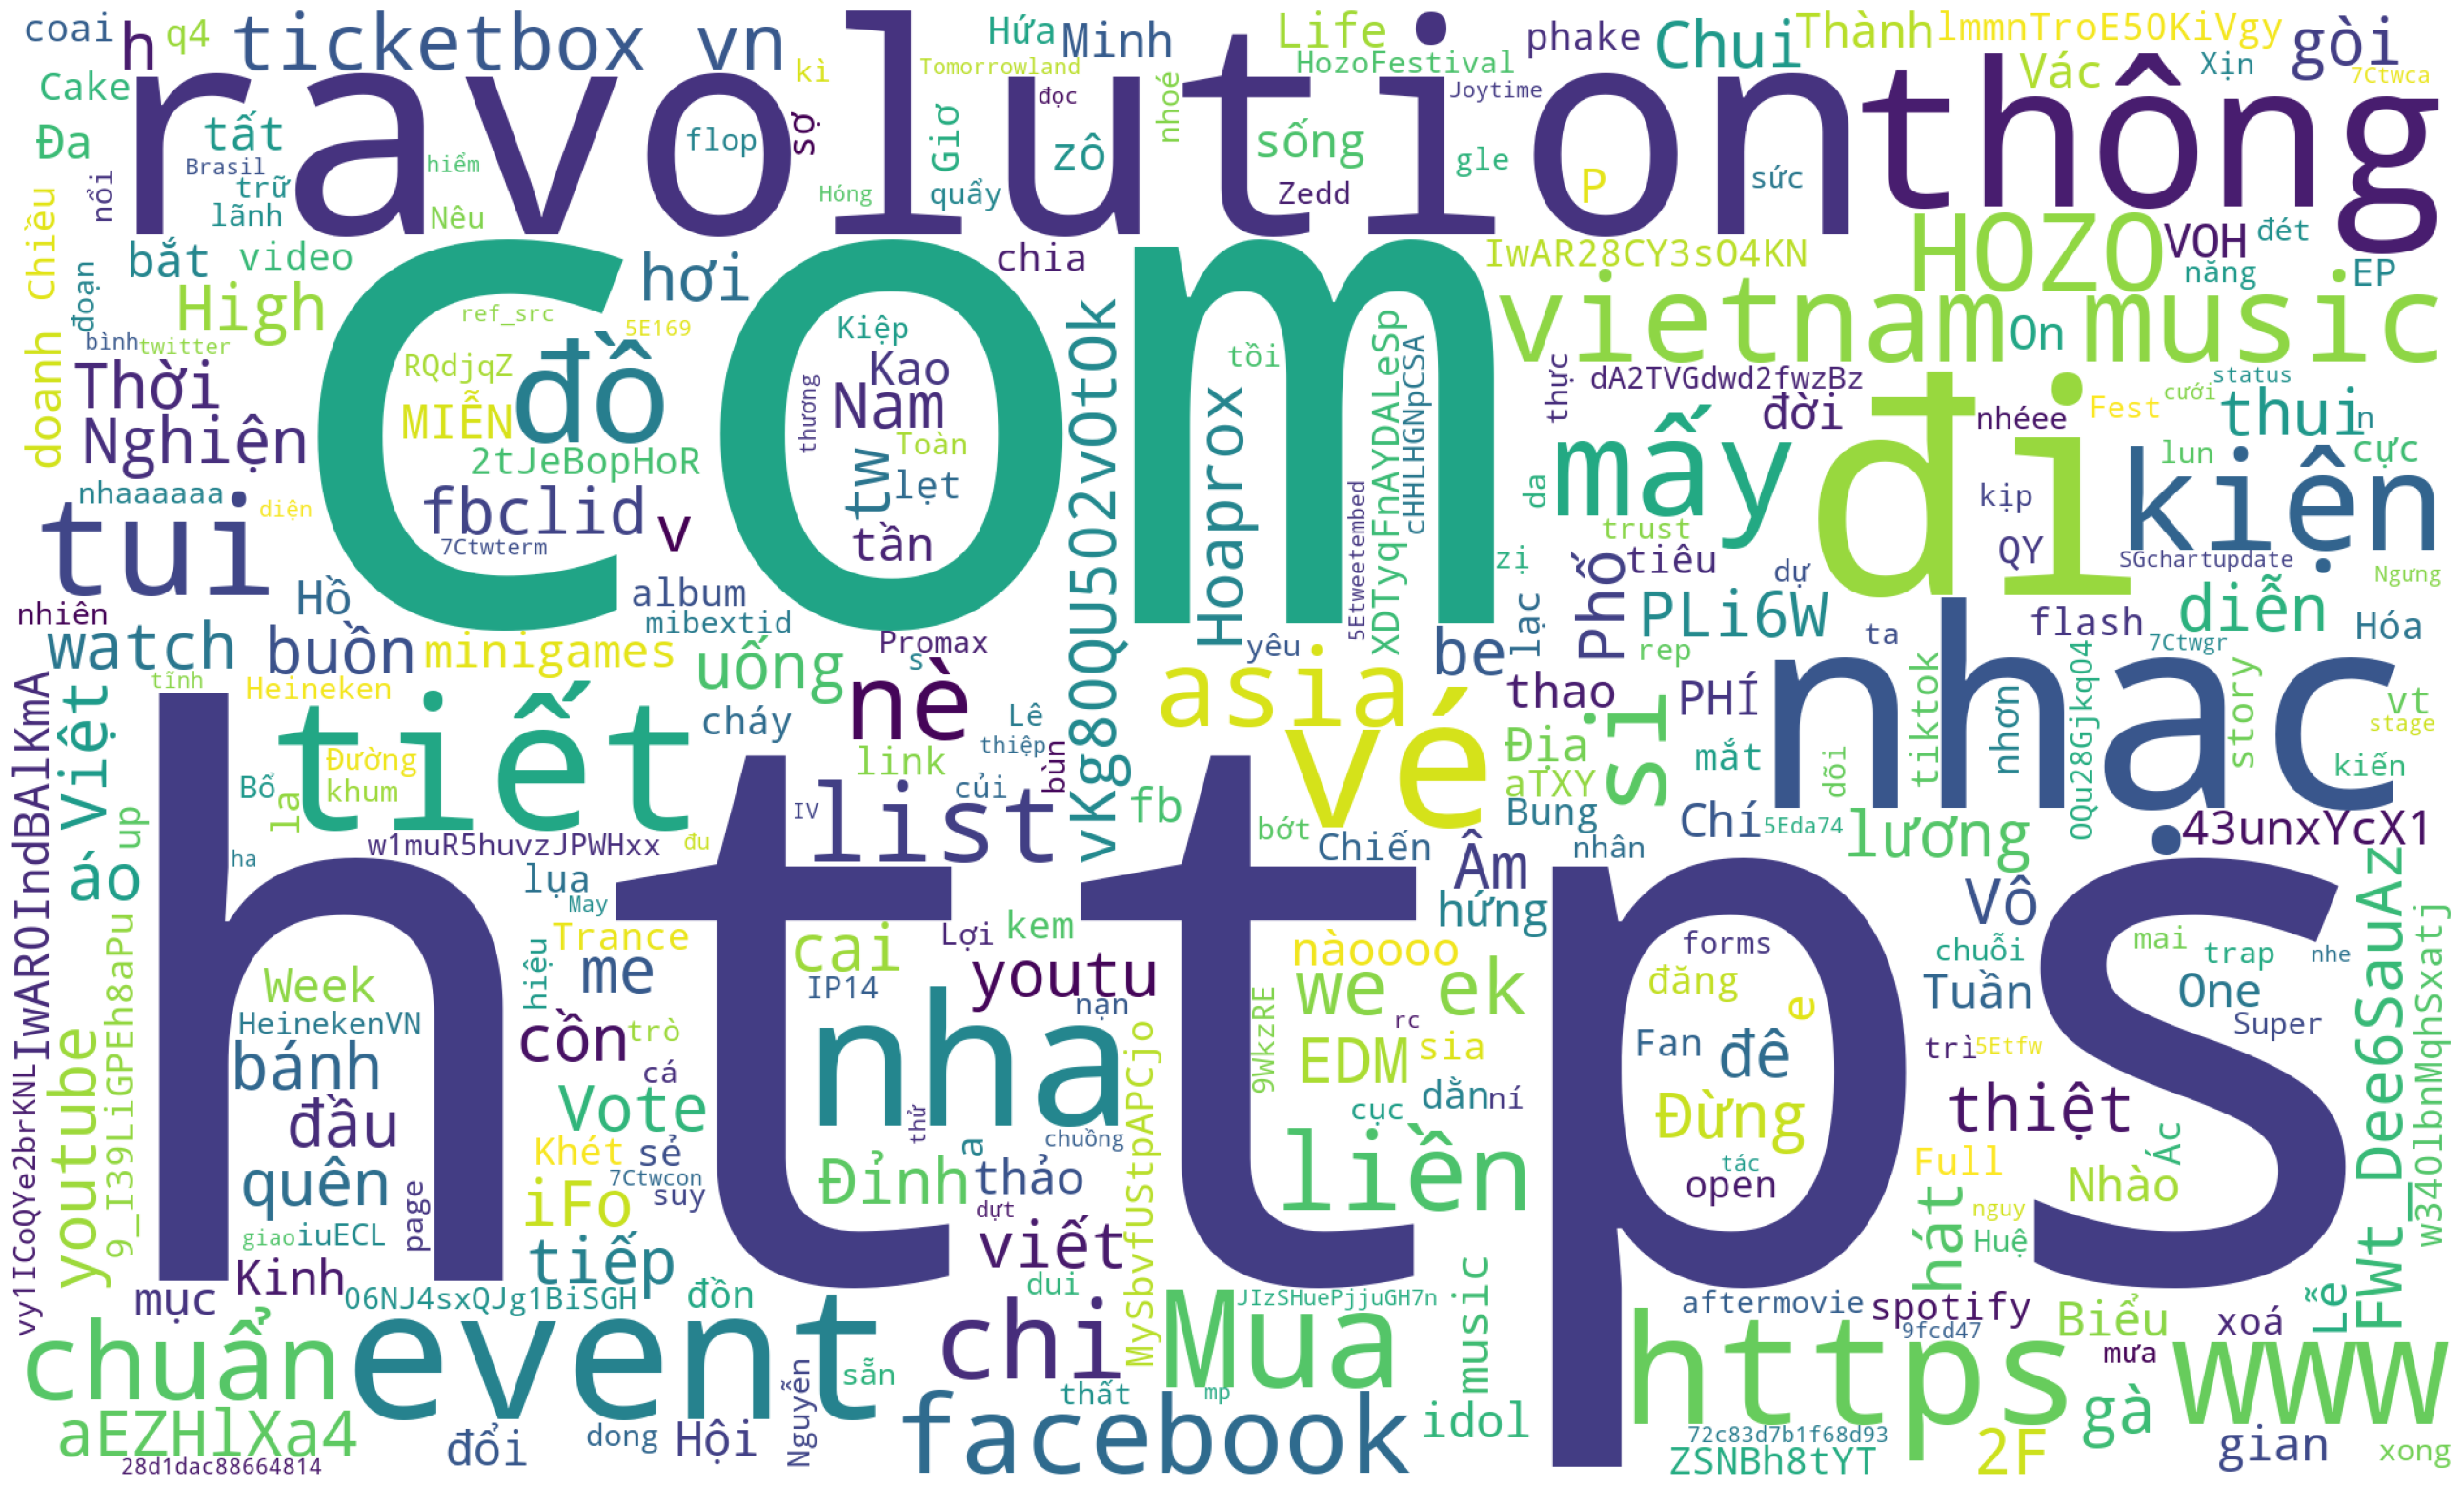

In [732]:
wordcloud = WordCloud(stopwords=STOPWORDS,
                          background_color='white', 
                      max_words=300,
                      width=2000, height=1200
                         ).generate(comment_text1)
plt.figure(figsize=(40,20))
plt.clf()
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

Thói quen comment của người dùng tên Hiền Lý Kim

In [733]:
comment_text2 = "" 
for txt in comments_full_df.loc[(comments_full_df['commenter_name'] == 'Hiền Lý Kim'), 'comment_text']:
    comment_text2 = comment_text2 + str(txt) + "\n"
comment_text2

'Thấy đáng mà trời 🙂\nThế Anh Bùi thấy hội thảo và showcase hợp với em\nQuân Võ 😬😬\nChiến quá chiến Thanh Huyen\nMua vé chưa Thanh Huyen :))\nVideo đâu hết rồi Trung Hậu\nOk quất\nThanh Huyen 😩😩\nTPHCM cuối năm số hưởng :))\nĐược đếyyyy\nquá md 🙂 gặp t t kéo team quánh cho bờm cái đầu lun é\nThề hay lắm luôn ạ :((\nBài nào cũng buồn\nVừa nấu ăn vừa đánh Riddim 🙂\nVẫn độc toàn thân\nBạn tồi Thanh Huyen\nXui thiệt\nQuen r\nNói anh nè Lost Frequencies :)\n'

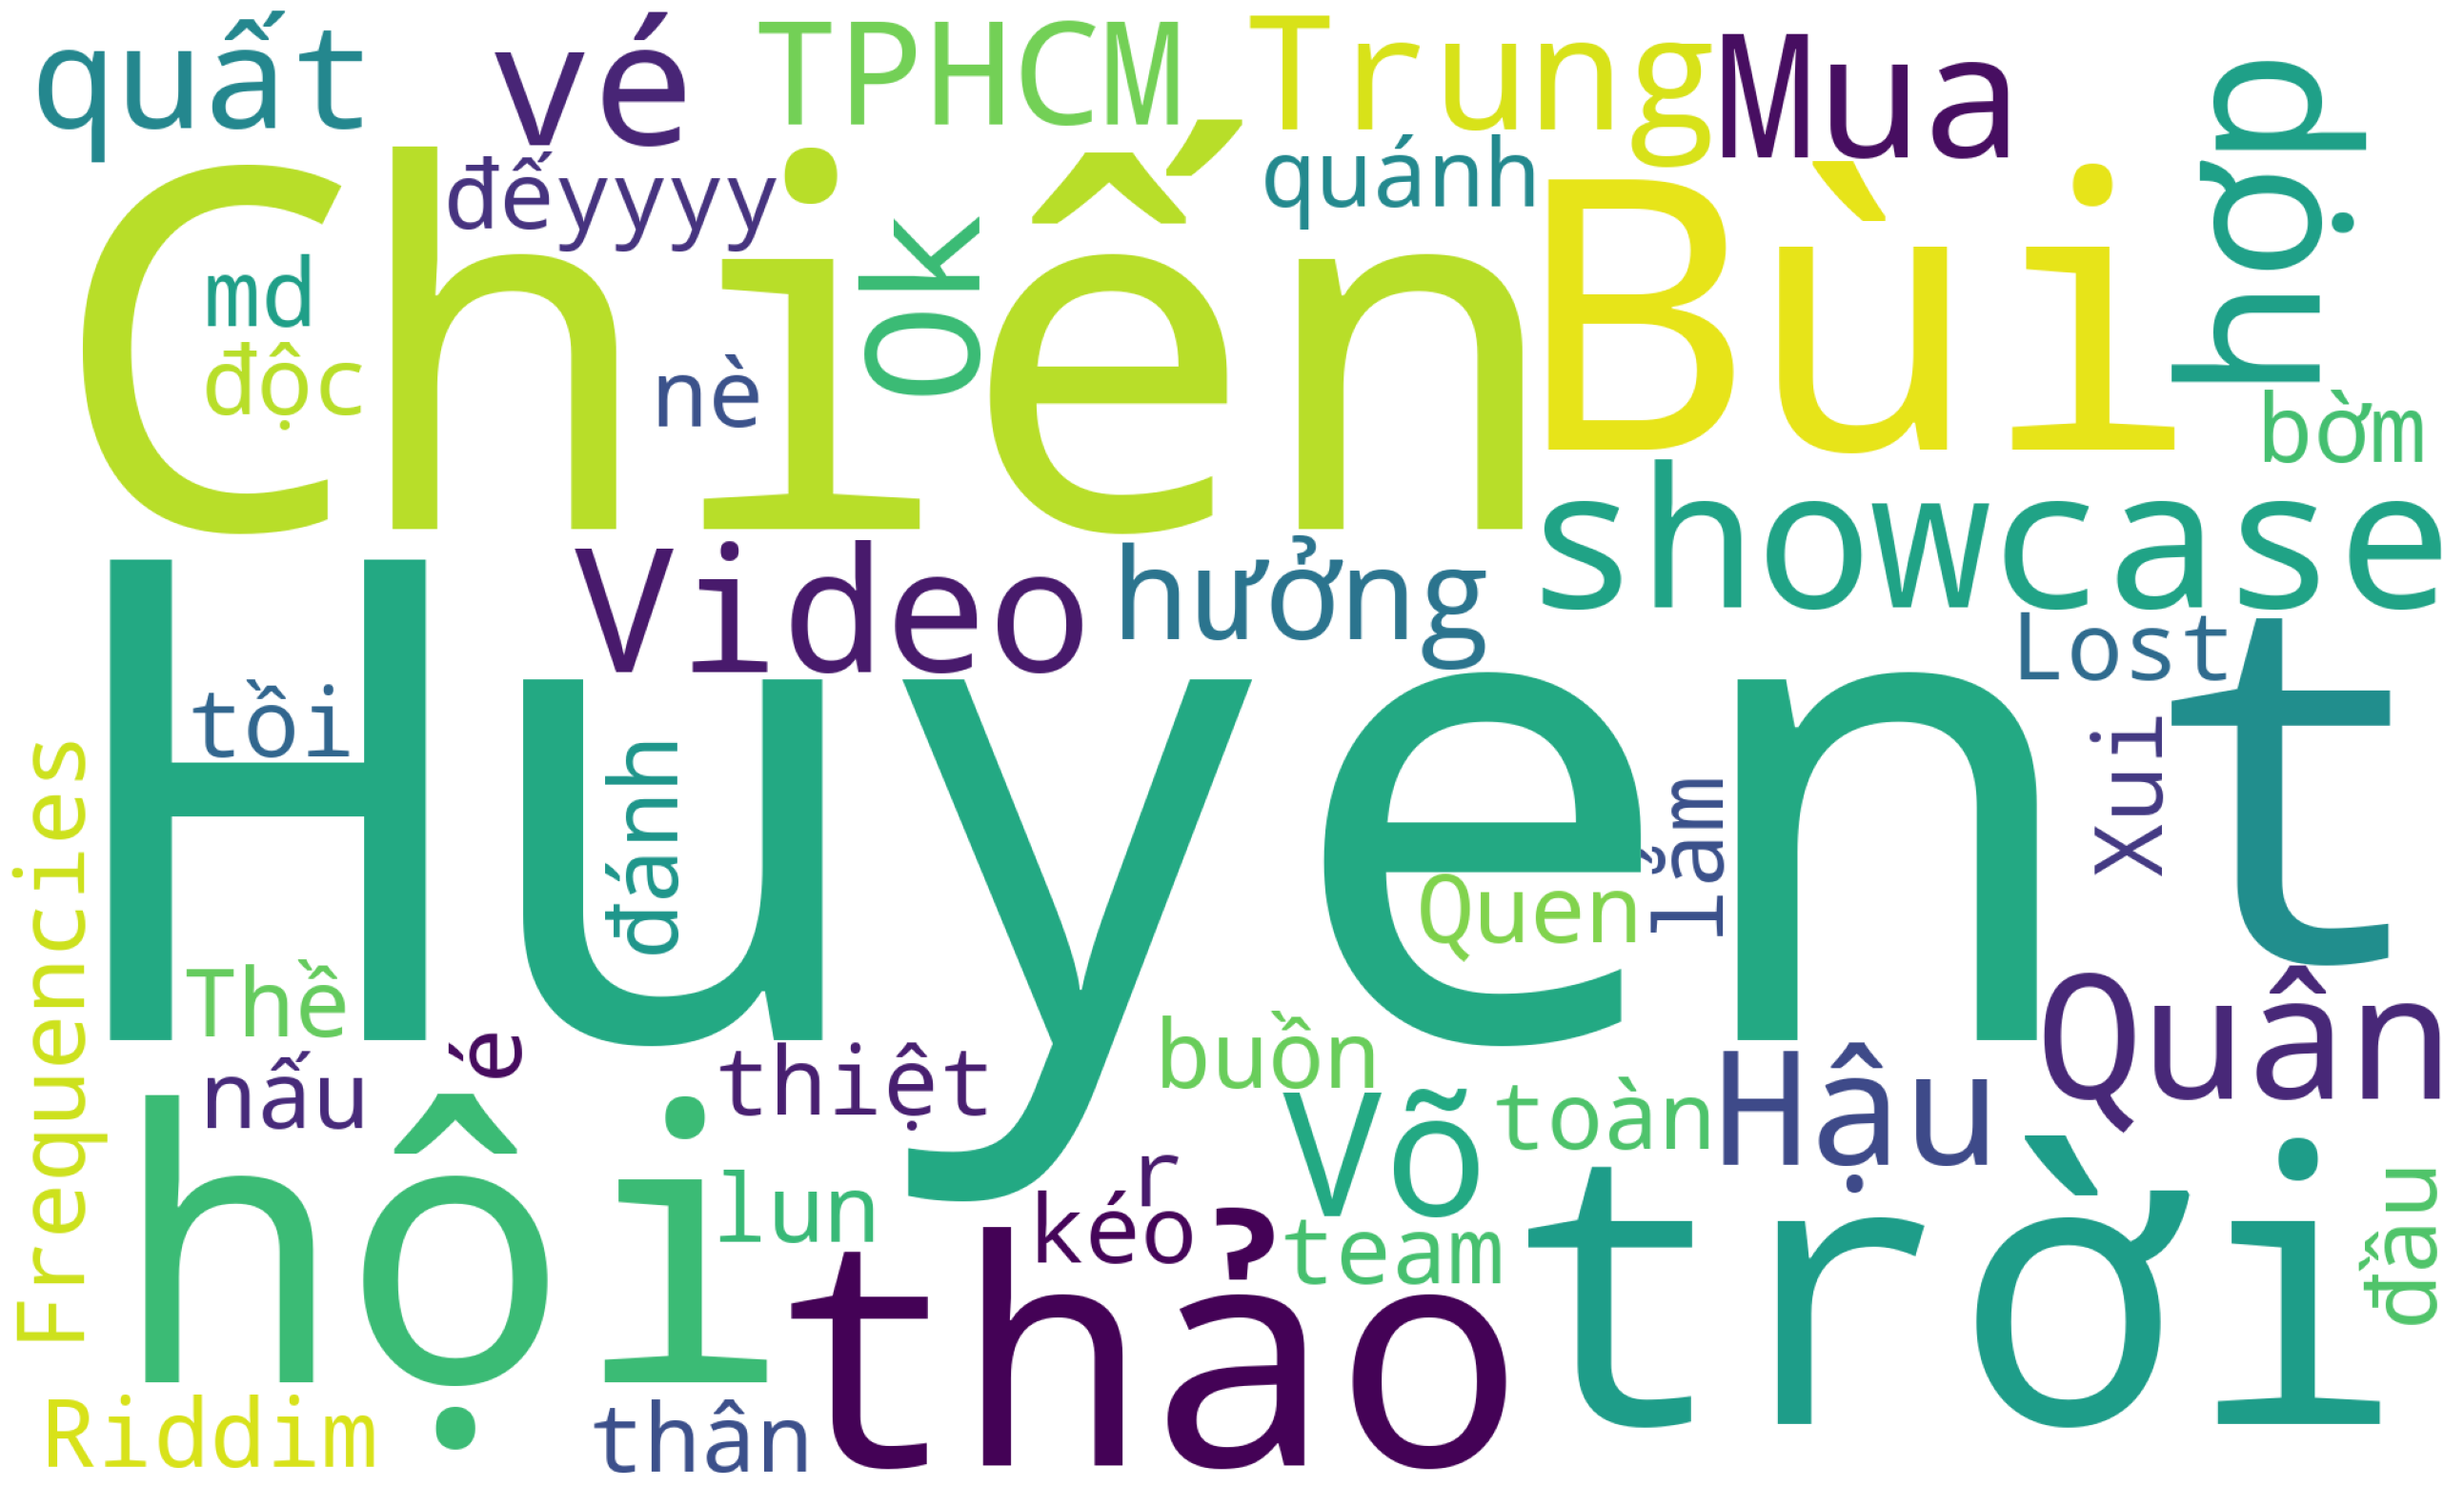

In [734]:
wordcloud = WordCloud(stopwords=STOPWORDS,
                          background_color='white', 
                      max_words=300,
                      width=2000, height=1200
                         ).generate(comment_text2)
plt.figure(figsize=(40,20))
plt.clf()
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

Thói quen comment của người dùng tên Dang Chi Huong

In [735]:
comment_text3 = "" 
for txt in comments_full_df.loc[(comments_full_df['commenter_name'] == 'Dang Chi Huong'), 'comment_text']:
    comment_text3 = comment_text3 + str(txt) + "\n"
comment_text3

'Tuyệtttt\nAnh Da Twee đâu òi 🥹\nAd lên giờ linh :))\nNói to quâ nha\nHappy happy\nCăng thế Headbangers 🔥🔥\nỎ :))\n🙌🏻\nVậy mà mình chưa có :))\nNhạc ông này cháy vl\nNhảy phụ họa đâu shop :))\nTuyệt\nTuyệt 🥰\n🔥\n'

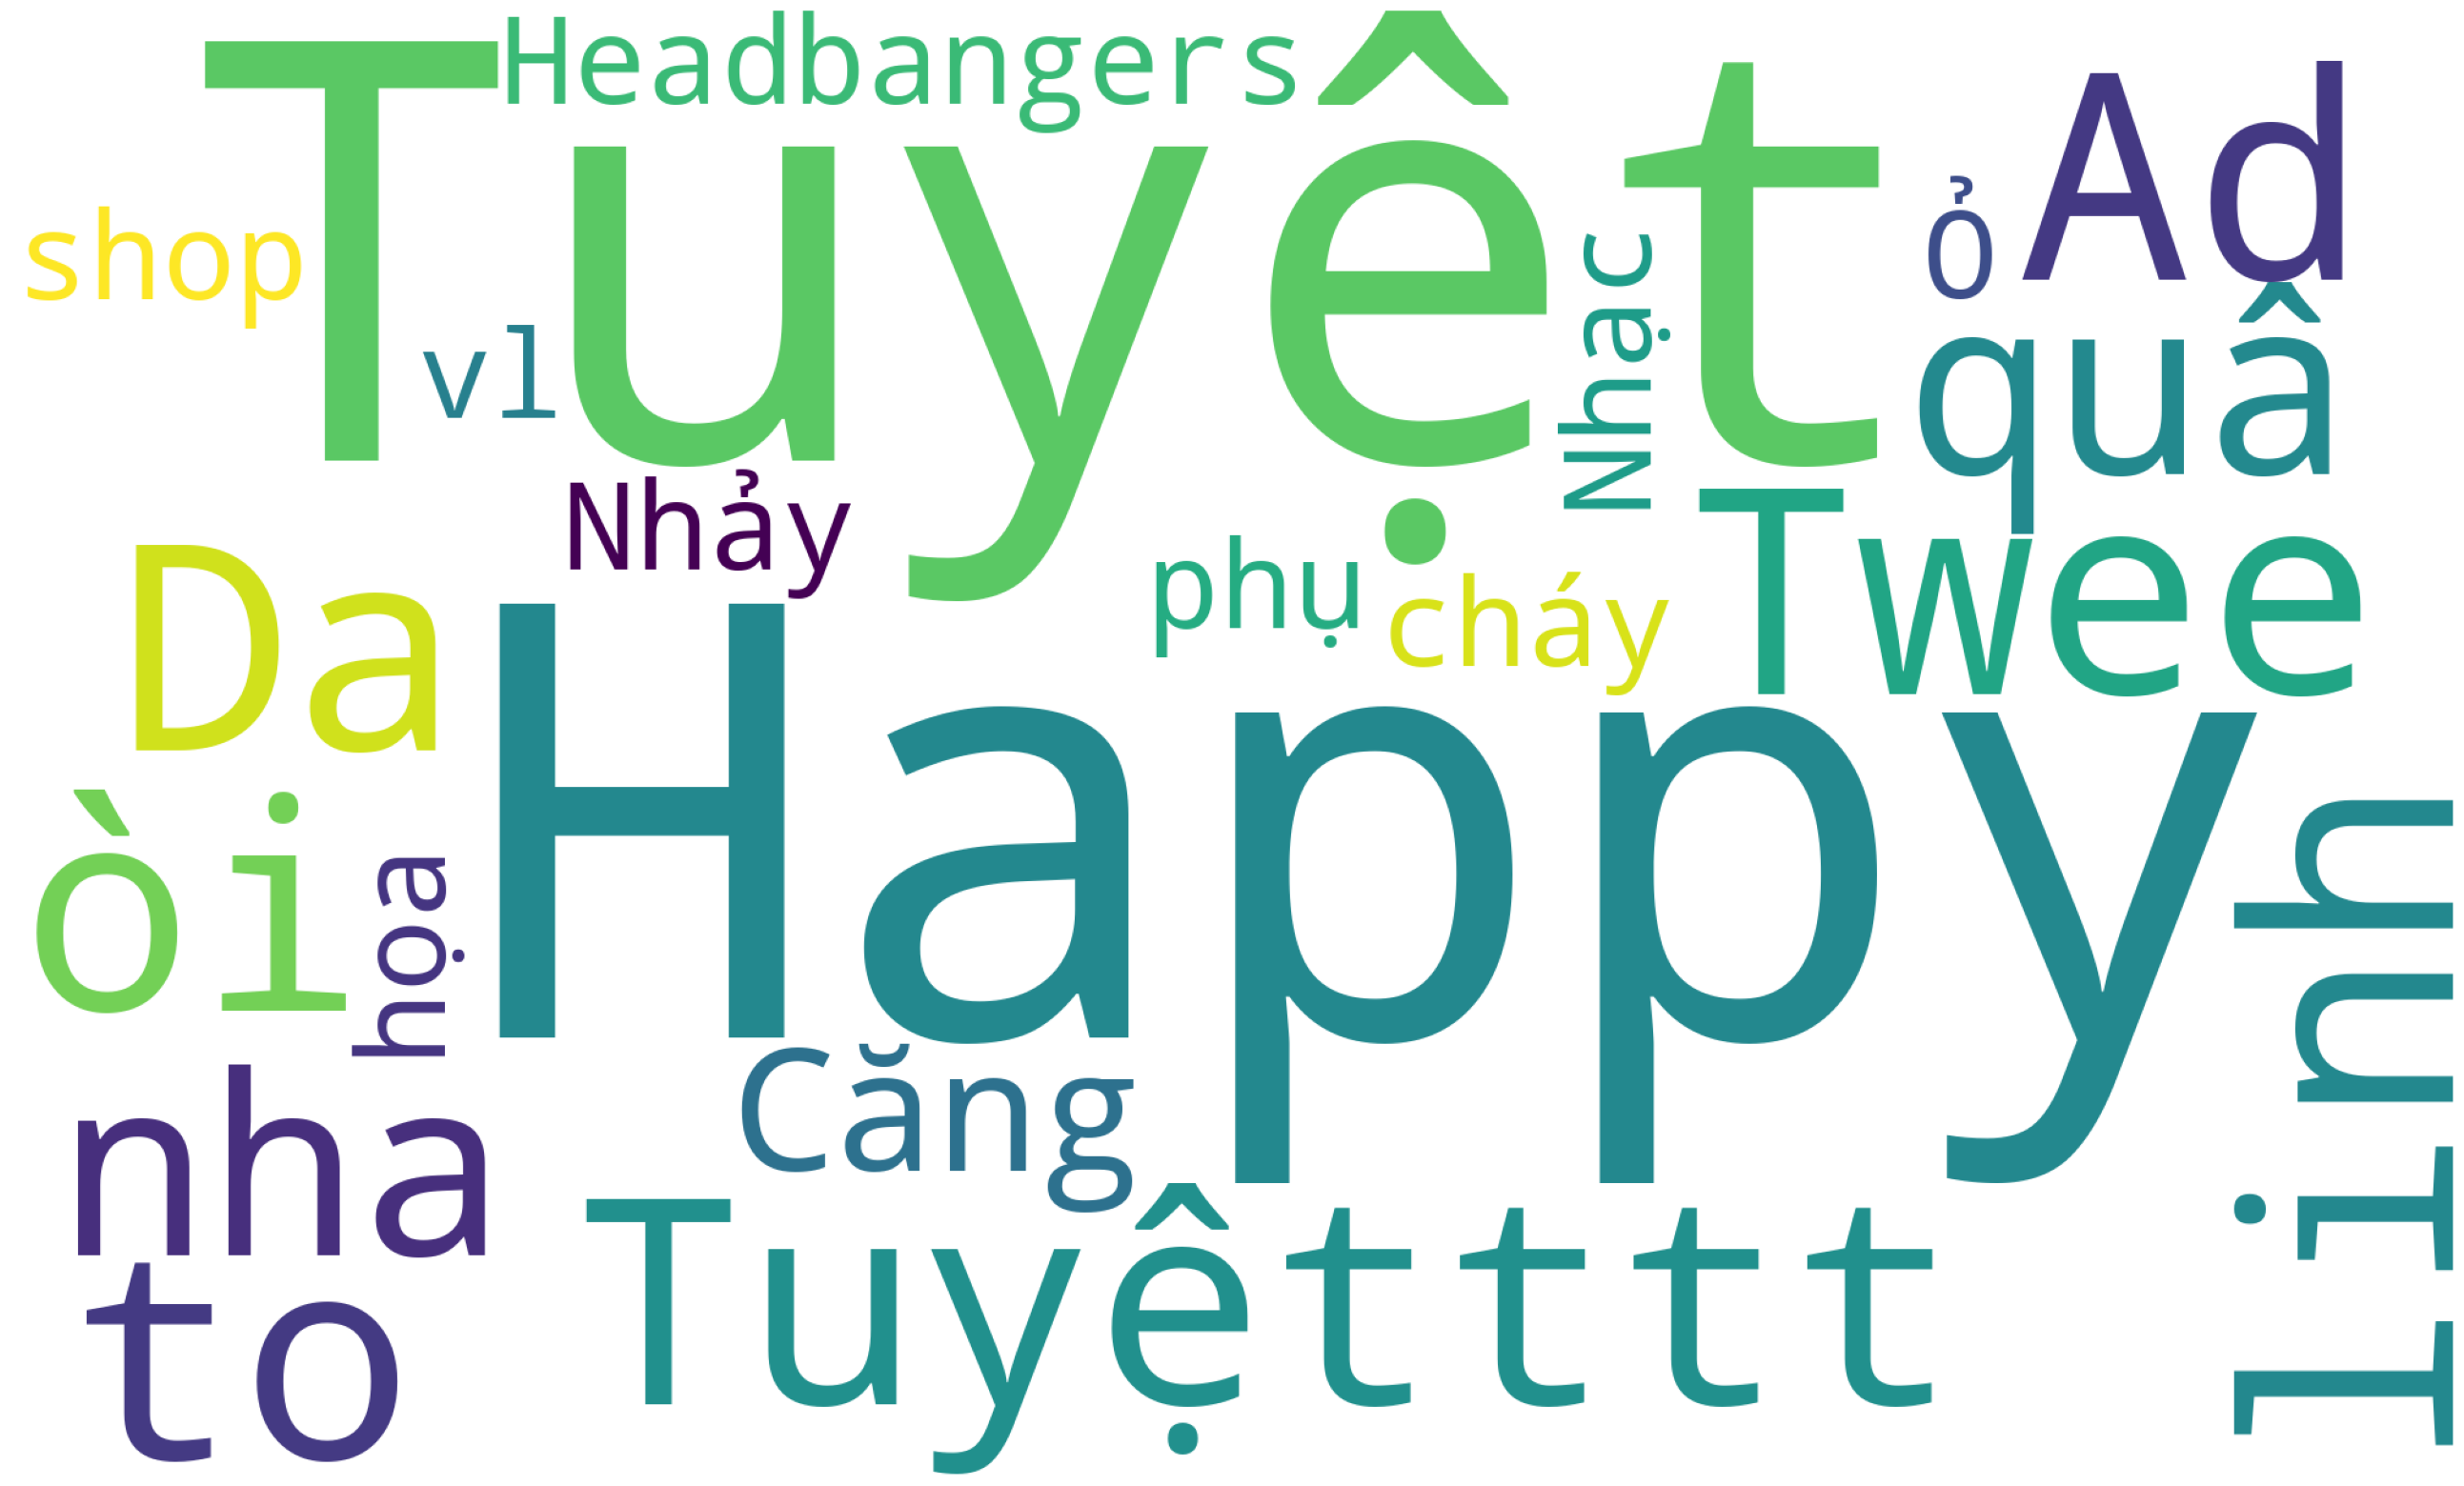

In [736]:
wordcloud = WordCloud(stopwords=STOPWORDS,
                          background_color='white', 
                      max_words=300,
                      width=2000, height=1200
                         ).generate(comment_text3)
plt.figure(figsize=(40,20))
plt.clf()
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

Dự đoán số lượt thích dựa trên số lượt reaction bằng phương pháp hồi quy tuyến tính (linear regression)

In [737]:
X = reactions_df['reaction_count'].values

y = reactions_df['thích'].astype('int64').values

In [738]:
%pip install scikit-learn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [739]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [767]:
print(X.shape)
print(y.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)

X_train = np.array(X_train).reshape(-1, 1)
X_test = np.array(X_test).reshape(-1, 1)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(111,)
(111,)
(88, 1)
(23, 1)
(88,)
(23,)


In [768]:
model = LinearRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

y_pred

array([  359.23385996,   190.79118471,   166.15727568,   178.80712086,
         278.0085383 ,  1834.60527641,   102.90804979,   961.76595919,
         445.78543223,   163.49415038,   284.00057022,   458.4352774 ,
         144.85227328,   142.8549293 ,   108.90008172,   268.02181842,
         106.90273775,   247.38259734,   445.78543223,   501.04528221,
          62.96117029, 25085.02071197, 14874.59831006])

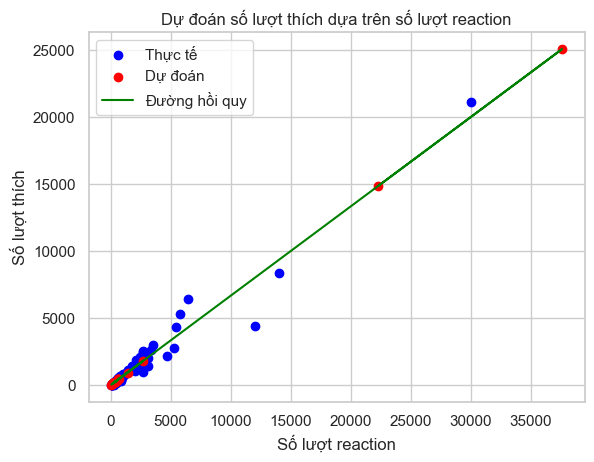

In [770]:
plt.scatter(X_train, y_train, color='blue', label='Thực tế')
plt.scatter(X_test, y_pred, color='red', label='Dự đoán')
plt.plot(X_test, y_pred, color='green', label='Đường hồi quy')
plt.xlabel('Số lượt reaction')
plt.ylabel('Số lượt thích')
plt.title('Dự đoán số lượt thích dựa trên số lượt reaction')
plt.legend()
plt.show()